# Income Prediction of a Dating App's Users

## 1. Introduction
In this notebook we will develop supervised machine learning (ML) models to predict 'income' of users of a dating app called OKCupid. The dataset was provided by [Codecademy.com](https://www.codecademy.com).

The question that this project has sought to answer:
- What is the best ML model (out of selected models) to predict income?

This notebook has three parts: Introduction, Analysis, and Conclusion. Analysis contains smaller parts: Load and Check Data, Preprocessing, Exploratory Analysis, Feature Engineering, and Building ML Models.

## 2. Analysis

The data is stored in `profiles.csv`. The dataset provided has the following columns of multiple-choice data:
- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

### 2. 1. Loading and Checking the Data

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

sns.set_theme()

In [2]:
df = pd.read_csv('profiles.csv')

pd.set_option('display.max_columns', None)
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [4]:
for column in df.drop(['essay' + f'{i}' for i in range(10)], axis=1).columns:
    print(f'Column: {column} | Unique entries: {df[column].nunique()} | Null values: {df[column].isna().sum()}')
    print(df[column].value_counts())
    print()

Column: age | Unique entries: 54 | Null values: 0
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64

Column: body_type | Unique entries: 12 | Null values: 5296
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
ja

Column: smokes | Unique entries: 5 | Null values: 5512
no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

Column: speaks | Unique entries: 7647 | Null values: 50
english                                                                21828
english (fluently)                                                      6628
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay

In [5]:
# Find columns that has no null value
full_columns = []
for column in df.columns:
    if df[column].isna().sum() == 0:
        full_columns.append(column)
print(full_columns)

['age', 'income', 'last_online', 'location', 'orientation', 'sex', 'status']


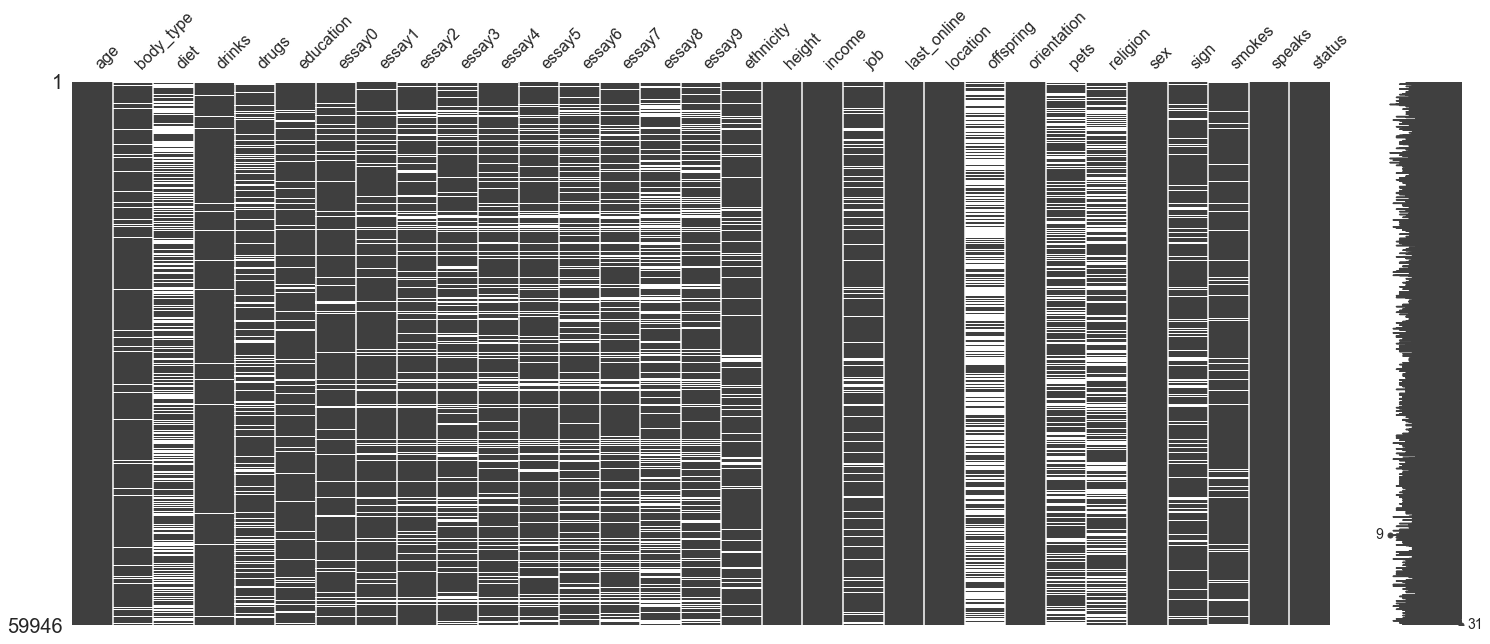

<Figure size 432x288 with 0 Axes>

In [6]:
# Visualize null values distribution
msno.matrix(df)
plt.show()
plt.clf()

In [7]:
df.duplicated().value_counts()

False    59946
dtype: int64

### 2. 2. Preprocessing

In this section, we will drop some columns because of various reasons:
- `['diet', 'offspring', 'pets', 'religion']` are dropped because of too many missing values
- `['essay0, 'essay1', ... , 'essay9']` are dropped for less complexity
- `['sign', 'height', 'last_online']` are dropped because of likely irrelevance to the problem

Then we will check each column and prepare it for further exploratory analysis, such as impute missing values, remove unrealistic values, group several categories with low density into one category, etc.

In [8]:
# Drop unwanted columns
df = df.drop(['diet', 'offspring', 'pets', 'religion'], axis=1)
for i in range(0, 10):
    df = df.drop('essay'+str(i), axis=1)    
df = df.drop(['sign', 'height', 'last_online'], axis=1)

**Age**

In [9]:
df.age.describe()

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

In [10]:
df[df.age > 100]

,age,body_type,drinks,drugs,education,ethnicity,income,job,location,orientation,sex,smokes,speaks,status
2512,110,NaN,NaN,NaN,NaN,NaN,-1,NaN,"daly city, california",straight,f,NaN,english,single
25324,109,athletic,NaN,never,working on masters program,NaN,-1,student,"san francisco, california",straight,m,when drinking,english (okay),available


In [11]:
df = df.drop(df[df.age > 100].index)

**Body Type**

In [12]:
df.body_type.value_counts(dropna=False)

average           14652
fit               12711
athletic          11818
NaN                5295
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

In [13]:
df['body_type'] = df.body_type.fillna('unknown')

**Drinks**

In [14]:
df.drinks.value_counts(dropna=False)

socially       41780
rarely          5957
often           5164
not at all      3267
NaN             2983
very often       471
desperately      322
Name: drinks, dtype: int64

In [15]:
df['drinks'] = df.drinks.fillna('unknown')

**Drugs**

In [16]:
df.drugs.value_counts(dropna=False)

never        37723
NaN          14079
sometimes     7732
often          410
Name: drugs, dtype: int64

In [17]:
df['drugs'] = df.drugs.fillna('unknown')

**Education**

In [18]:
df.education.value_counts(normalize=True, dropna=False)

graduated from college/university    0.399690
graduated from masters program       0.149490
NaN                                  0.110553
working on college/university        0.095289
working on masters program           0.028060
graduated from two-year college      0.025541
graduated from high school           0.023822
graduated from ph.d program          0.021220
graduated from law school            0.018717
working on two-year college          0.017917
dropped out of college/university    0.016599
working on ph.d program              0.016399
college/university                   0.013362
graduated from space camp            0.010960
dropped out of space camp            0.008725
graduated from med school            0.007440
working on space camp                0.007424
working on law school                0.004488
two-year college                     0.003703
working on med school                0.003537
dropped out of two-year college      0.003186
dropped out of masters program    

In [19]:
df['education'] = df.education.fillna('unknown')

**Ethnicity**

In [20]:
df.ethnicity.value_counts(normalize=True, dropna=False).to_frame().head(15)

,ethnicity
white,0.547695
asian,0.102329
NaN,0.094722
hispanic / latin,0.047094
black,0.033498
other,0.028460
"hispanic / latin, white",0.021704
indian,0.017967
"asian, white",0.013529
"white, other",0.010693


In [21]:
df['ethnicity'] = df.ethnicity.fillna('unknown')

In [22]:
# Group ethnicity categories that have proportion below 1% into a category named 'other1'
ethnic_percent = df.ethnicity.value_counts(normalize=True, dropna=False).to_frame()
ethnic_below_1pct = ethnic_percent[ethnic_percent.ethnicity < 0.01].index.to_list()
df['ethnicity'] = df['ethnicity'].replace(ethnic_below_1pct, 'other1')

**Income**

In [23]:
df.income.value_counts().to_frame().reset_index().sort_values('index')

,index,income
0,-1,48440
1,20000,2952
4,30000,1048
5,40000,1005
6,50000,975
7,60000,736
8,70000,707
3,80000,1111
2,100000,1621
9,150000,631


In [24]:
df = df.drop(df[df.income == -1].index)

**Job**

In [25]:
df.job.value_counts(dropna=False)

other                                1541
computer / hardware / software       1156
artistic / musical / writer          1042
student                               992
science / tech / engineering          976
sales / marketing / biz dev           870
education / academia                  738
medicine / health                     649
executive / management                557
entertainment / media                 461
banking / financial / real estate     365
construction / craftsmanship          357
hospitality / travel                  345
NaN                                   341
law / legal services                  217
clerical / administrative             204
political / government                195
transportation                        140
unemployed                            101
military                               98
rather not say                         89
retired                                70
Name: job, dtype: int64

In [26]:
df['job'] = df.job.fillna('unknown')

We drop entries that job are student or unemployed, since we can suspect that many of them have no income yet.

In [27]:
df = df.drop(df[df.job.isin(['student', 'unemployed'])].index)

**Location**

In [28]:
df.location.value_counts(normalize=True).to_frame().head(5)

,location
"san francisco, california",0.452694
"oakland, california",0.135049
"berkeley, california",0.057535
"san mateo, california",0.028528
"alameda, california",0.020075


In [29]:
# Group locations that have proportion below 1% into a category named 'other'
loc_percent = df.location.value_counts(normalize=True).to_frame()
loc_below_1pct = loc_percent[loc_percent.location < 0.01].index

df['location'] = df['location'].replace(loc_below_1pct, 'other')

**Orientation**

In [30]:
df.orientation.value_counts(dropna=False)

straight    9203
gay          696
bisexual     512
Name: orientation, dtype: int64

**Sex**

In [31]:
df.sex.value_counts(dropna=False)

m    7664
f    2747
Name: sex, dtype: int64

**Smokes**

In [32]:
df.smokes.value_counts(dropna=False)

no                7433
sometimes          830
when drinking      690
yes                580
NaN                492
trying to quit     386
Name: smokes, dtype: int64

In [33]:
df['smokes'] = df['smokes'].fillna('unknown')

**Speaks**

In [34]:
df.speaks.value_counts(normalize=True, dropna=False)

english                                                                                   0.326386
english (fluently)                                                                        0.141581
english (fluently), spanish (poorly)                                                      0.041591
english (fluently), spanish (okay)                                                        0.034579
english (fluently), spanish (fluently)                                                    0.021804
                                                                                            ...   
english, chinese (okay), spanish (poorly), german (poorly)                                0.000096
english (fluently), japanese (okay), spanish (poorly), chinese (poorly)                   0.000096
english, french (okay), swedish (okay), danish (okay)                                     0.000096
english (fluently), french (fluently), spanish (okay), italian (okay), german (poorly)    0.000096
english (f

In [35]:
df[df.speaks.isna() == True]

,age,body_type,drinks,drugs,education,ethnicity,income,job,location,orientation,sex,smokes,speaks,status
1755,45,athletic,socially,never,graduated from college/university,white,100000,medicine / health,"san francisco, california",straight,m,no,NaN,single
6188,37,athletic,not at all,never,graduated from college/university,white,100000,computer / hardware / software,"san francisco, california",bisexual,m,no,NaN,single
19625,30,unknown,socially,never,graduated from college/university,white,50000,hospitality / travel,"san francisco, california",gay,m,trying to quit,NaN,single
20931,36,athletic,socially,never,graduated from masters program,white,100000,sales / marketing / biz dev,"san francisco, california",straight,m,no,NaN,single
41867,62,thin,rarely,never,graduated from ph.d program,"white, other",100000,other,other,gay,m,yes,NaN,available


In [36]:
# Impute missing values with the most common choice: 'english' 
for i in df[df.speaks.isna() == True].index:
    df.loc[i, 'speaks'] = 'english'

**Status**

In [37]:
df.status.value_counts(dropna=False)

single            9480
available          430
seeing someone     419
married             81
unknown              1
Name: status, dtype: int64

In [38]:
df[df.status == 'unknown']

,age,body_type,drinks,drugs,education,ethnicity,income,job,location,orientation,sex,smokes,speaks,status
57301,36,unknown,not at all,never,graduated from two-year college,unknown,20000,unknown,other,straight,f,no,english,unknown


In [39]:
# Impute missing value with the most common choice: 'english' 
df['status'] = df['status'].replace('unknown', 'single')

### 2. 3. Exploratory Analysis

In [40]:
print(df.income.describe())

count      10411.000000
mean      107364.326193
std       199367.847527
min        20000.000000
25%        30000.000000
50%        60000.000000
75%       100000.000000
max      1000000.000000
Name: income, dtype: float64


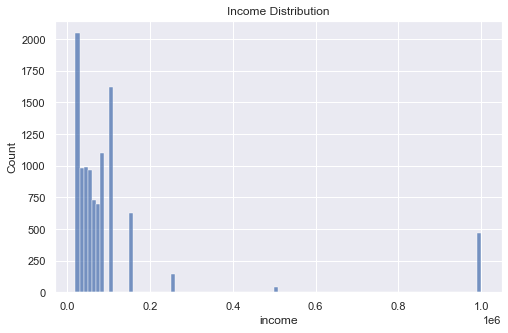

<Figure size 432x288 with 0 Axes>

In [41]:
# Plot income distribution in a histogram
plt.figure(figsize=(8, 5))
sns.histplot(x='income', data=df, binwidth=10000).set(title='Income Distribution')
plt.show()
plt.clf()

**Age**

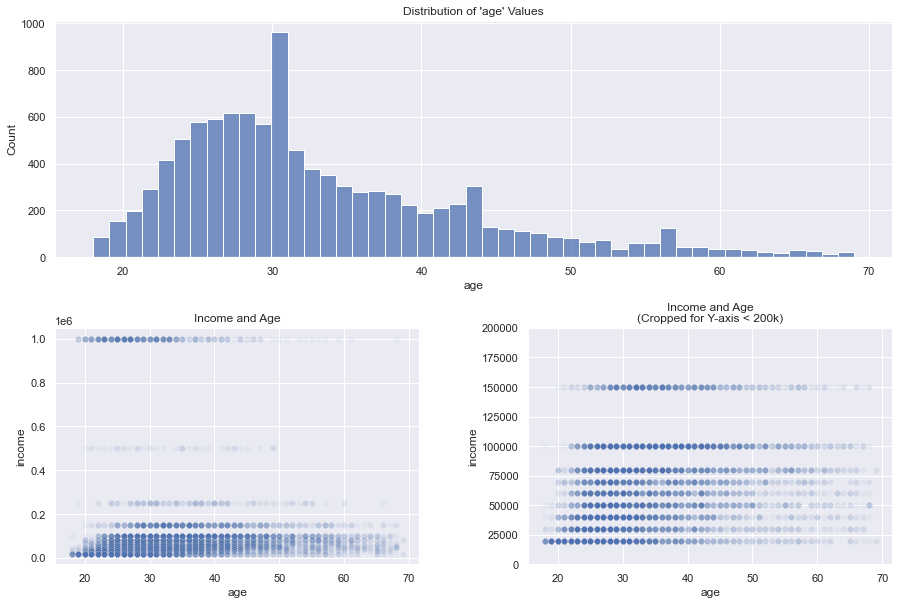

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Plot distribution of age in a histogram
plt.subplot2grid((2, 2), (0, 0), colspan=2)
sns.histplot(x='age', data=df).set(title='Distribution of \'age\' Values')

# Plot income and age in a scatter plot
plt.subplot2grid((2, 2), (1, 0))
sns.scatterplot(x='age', y='income', data=df, alpha=0.05).set(title='Income and Age')

# Plot income and age in a scatter plot (cropped view for income less than 200k)
plt.subplot2grid((2, 2), (1, 1))
sns.scatterplot(x='age', y='income', data=df, alpha=0.05).set(title='Income and Age\n(Cropped for Y-axis < 200k)')
plt.ylim(0, 200000)

plt.show()
plt.clf()

**Body Type**

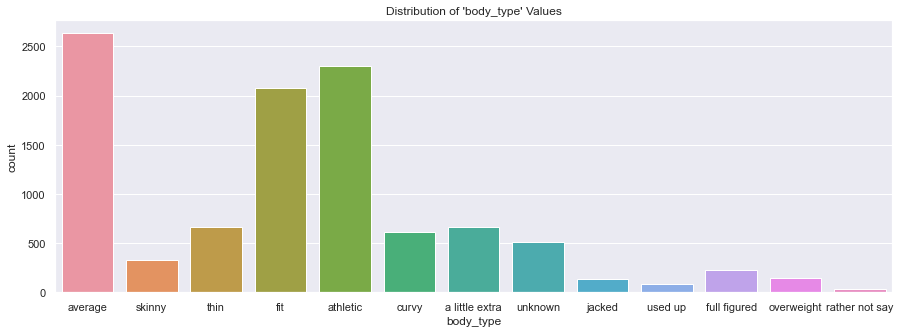

<Figure size 432x288 with 0 Axes>

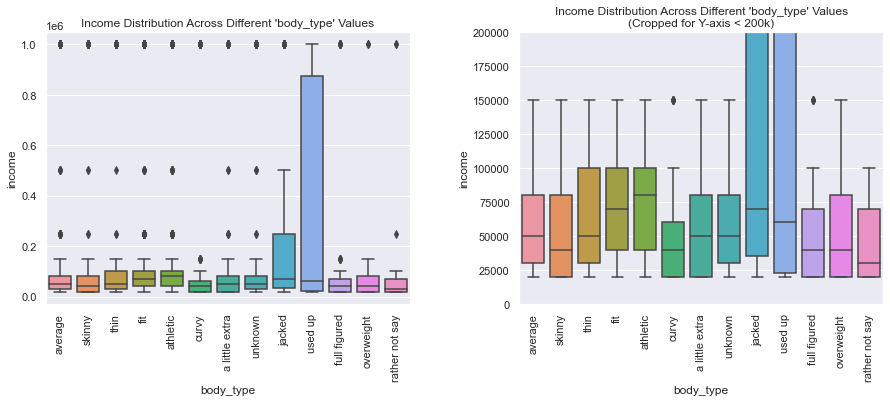

<Figure size 432x288 with 0 Axes>

In [43]:
# Function for plotting categorical variables distribution and income distribution across their values
def plot_categorical(col, order=None):
    plt.figure(figsize=(15,5))
    
    # Plot categorical variable distribution using count plot
    sns.countplot(x=col, data=df, order=order).set(title=f'Distribution of \'{col}\' Values')
    if df[col].nunique() > 15: plt.xticks(rotation=90)
    plt.show()
    plt.clf()
    
    plt.figure(figsize=(15,5))
    plt.subplots_adjust(wspace=0.3)
    
    # Plot income distribution across different categorical values using box plot
    plt.subplot(1, 2, 1, title=f'Income Distribution Across Different \'{col}\' Values')
    sns.boxplot(x=col, y='income', data=df, order=order)
    if df[col].nunique() > 6:plt.xticks(rotation=90)
    
    # Plot income distribution across different categorical values, cropped for income less than 200k, using box plot
    plt.subplot(1, 2, 2, title=f'Income Distribution Across Different \'{col}\' Values\n(Cropped for Y-axis < 200k)')
    sns.boxplot(x=col, y='income', data=df, order=order)
    plt.ylim(0,200000)
    if df[col].nunique() > 6:plt.xticks(rotation=90)

    plt.show()
    plt.clf()
    
plot_categorical('body_type')    

We find two values have very different distributions from the rest, they are 'jacked' and 'used up'. Let us plot income distribution of each of these two.

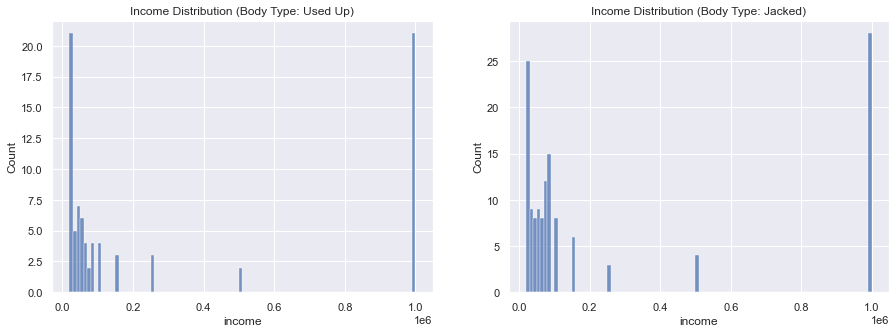

<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure(figsize=(15, 5))

# Plot income distribution of 'used up' body type in a histogram
plt.subplot(1, 2, 1, title='Income Distribution (Body Type: Used Up)')
sns.histplot(x='income', data=df[df.body_type == 'used up'], binwidth=10000)

# Plot income distribution of 'jacked' body type in a histogram
plt.subplot(1, 2, 2, title='Income Distribution (Body Type: Jacked)')
sns.histplot(x='income', data=df[df.body_type == 'jacked'], binwidth=10000)

plt.show()
plt.clf()

**Drinks**

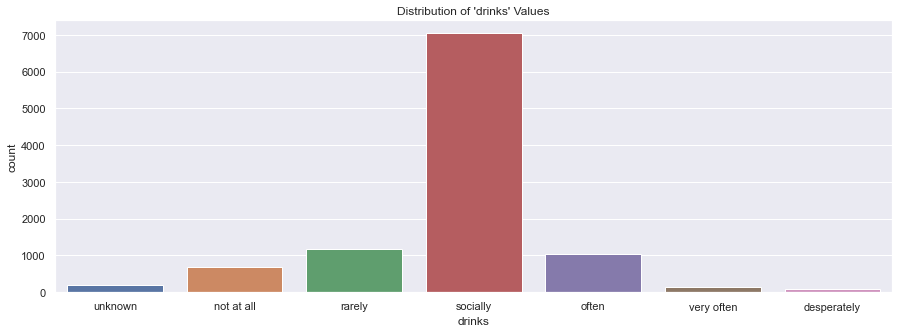

<Figure size 432x288 with 0 Axes>

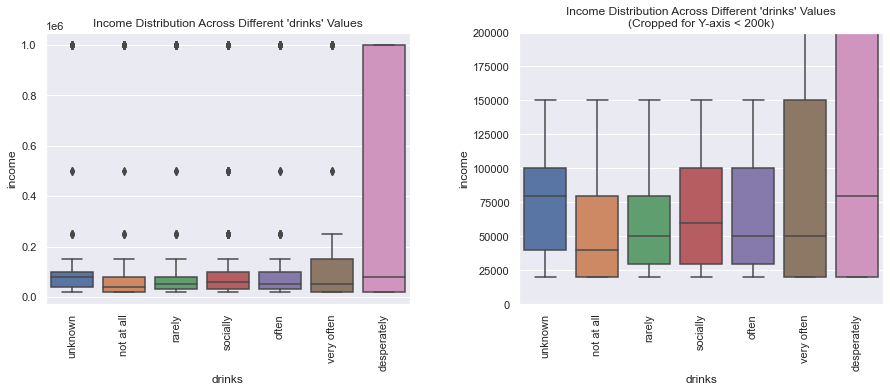

<Figure size 432x288 with 0 Axes>

In [45]:
order = ['unknown', 'not at all', 'rarely', 'socially', 'often',
       'very often', 'desperately']

plot_categorical('drinks', order) 

We find a value that has very different distribution from the rest, it 'desperately'. Let us plot income distribution of it.

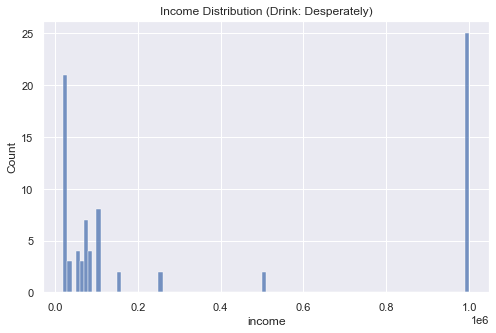

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize=(8, 5))
# Plot income distribution of 'desperately' value
sns.histplot(x='income', data=df[df.drinks == 'desperately'], binwidth=10000).set(title='Income Distribution (Drink: Desperately)')
plt.show()
plt.clf()

**Drugs**

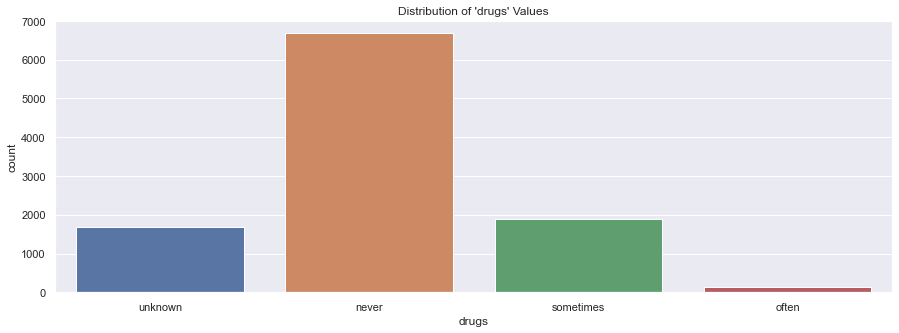

<Figure size 432x288 with 0 Axes>

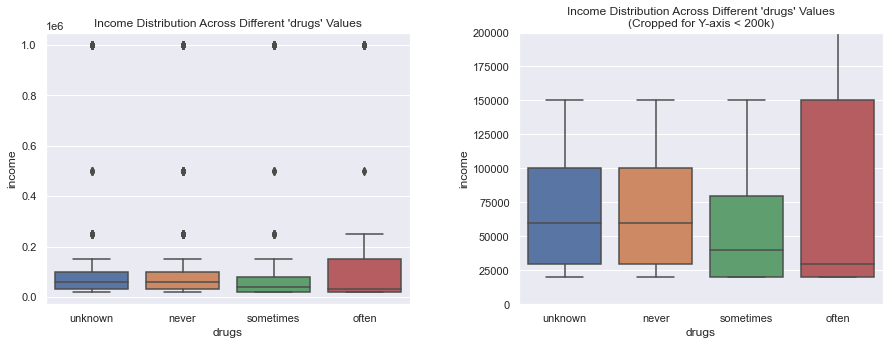

<Figure size 432x288 with 0 Axes>

In [47]:
order = ['unknown', 'never', 'sometimes', 'often']

plot_categorical('drugs', order)

**Education**

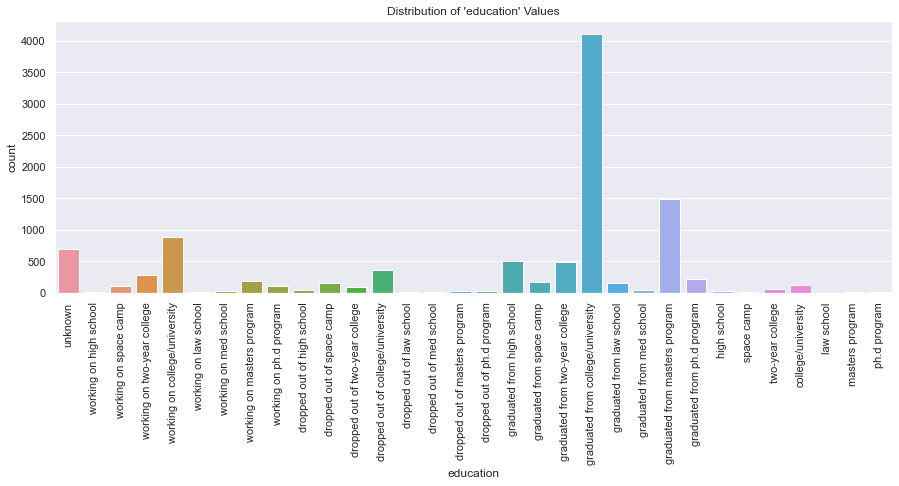

<Figure size 432x288 with 0 Axes>

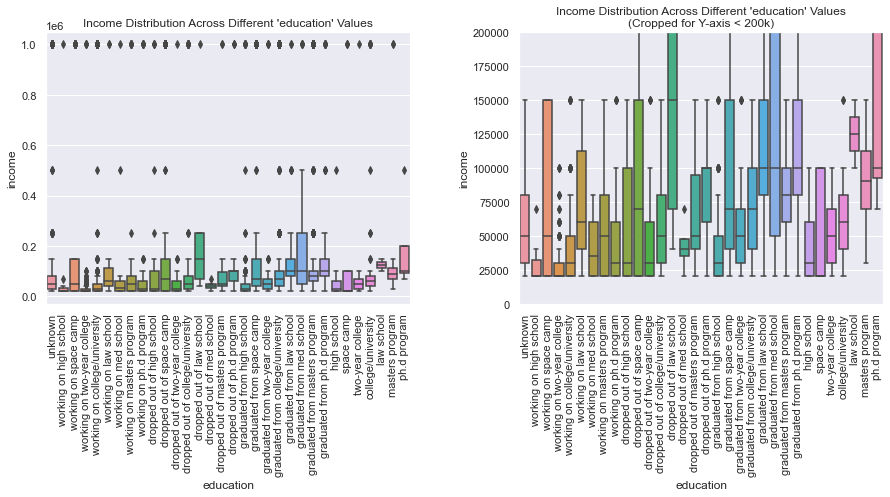

<Figure size 432x288 with 0 Axes>

In [48]:
order = ['unknown', 
         
       'working on high school', 'working on space camp', 'working on two-year college',
       'working on college/university', 
       'working on law school', 'working on med school', 
       'working on masters program', 'working on ph.d program',
       
       'dropped out of high school', 'dropped out of space camp',
       'dropped out of two-year college', 'dropped out of college/university',
       'dropped out of law school', 'dropped out of med school',
       'dropped out of masters program', 'dropped out of ph.d program',
         
       'graduated from high school', 'graduated from space camp',
       'graduated from two-year college', 'graduated from college/university', 
       'graduated from law school', 'graduated from med school',
       'graduated from masters program','graduated from ph.d program',
       
       'high school', 'space camp', 'two-year college',
       'college/university',  'law school', 'masters program' ,  'ph.d program']

plot_categorical('education', order) 

**Ethnicity**

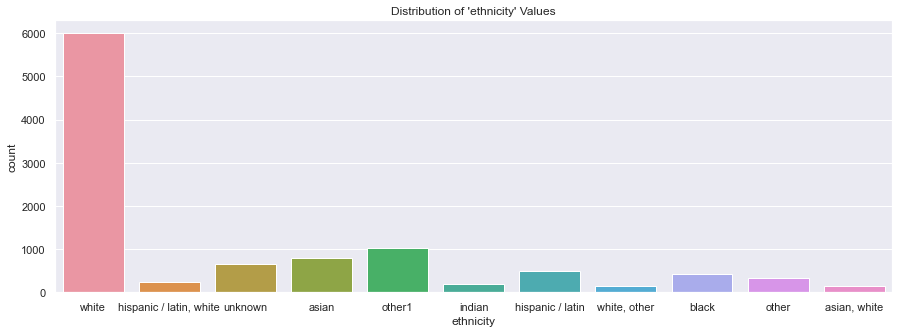

<Figure size 432x288 with 0 Axes>

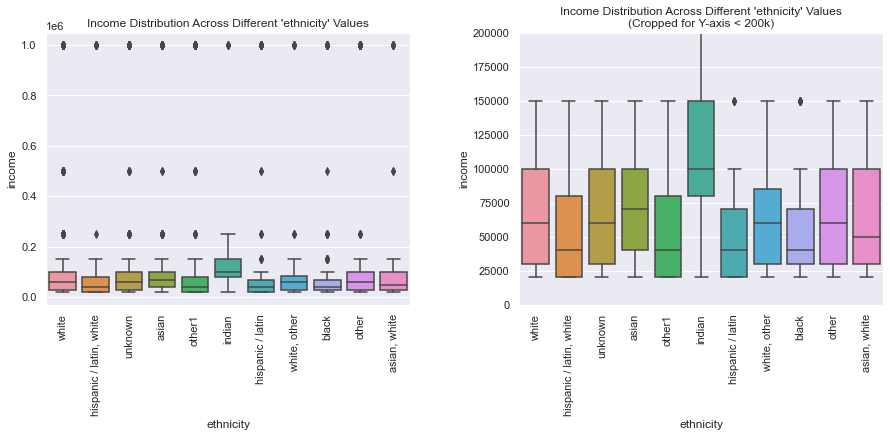

<Figure size 432x288 with 0 Axes>

In [49]:
plot_categorical('ethnicity') 

**Job**

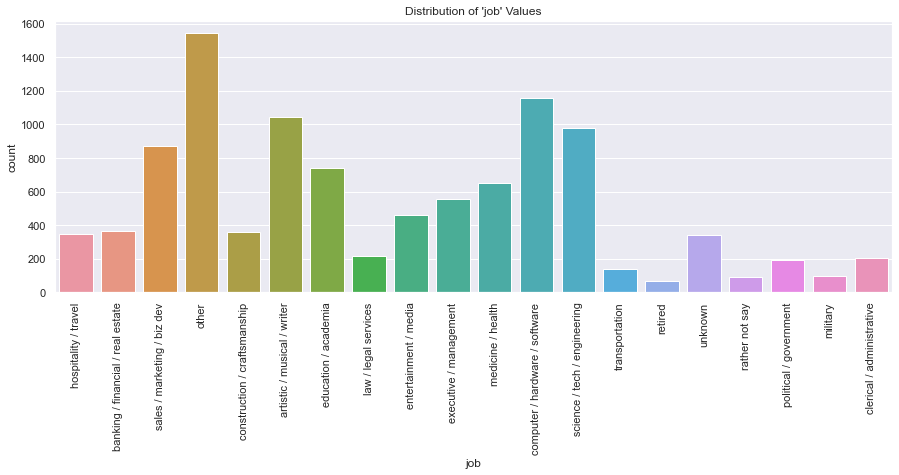

<Figure size 432x288 with 0 Axes>

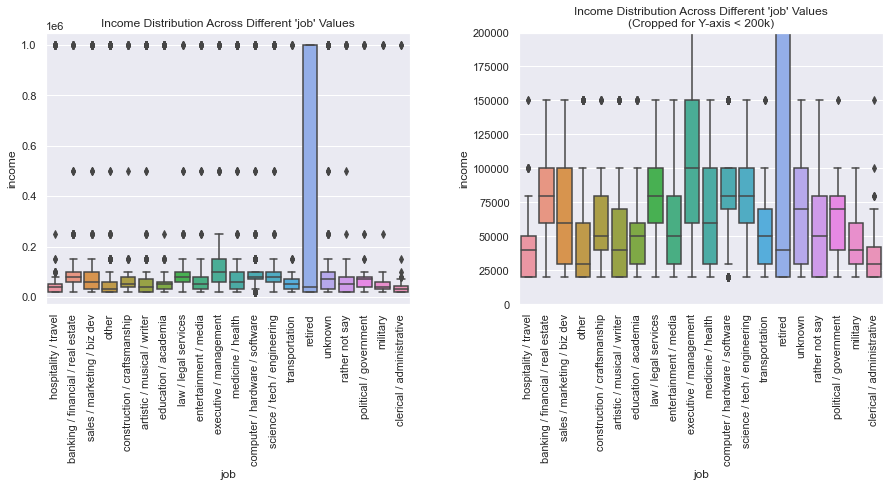

<Figure size 432x288 with 0 Axes>

In [50]:
plot_categorical('job') 

We find a value that has very different distribution from the rest, it is 'retired'. Let us plot income distribution of it.

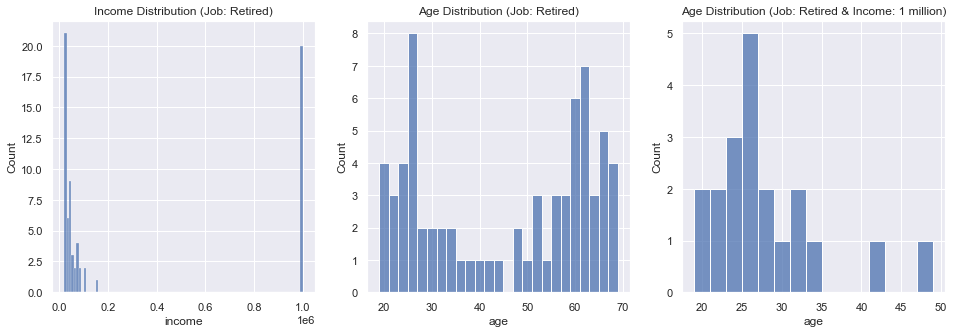

<Figure size 432x288 with 0 Axes>

In [51]:
plt.figure(figsize=(16, 5))

# Plot income distribution of 'retired' value in a histogram
plt.subplot(1, 3, 1, title='Income Distribution (Job: Retired)')
sns.histplot(x='income', data=df[df.job == 'retired'], binwidth=10000)

# Plot age distribution of 'retired' value in a histogram
plt.subplot(1, 3, 2, title='Age Distribution (Job: Retired)')
sns.histplot(x='age', data=df[df.job == 'retired'], binwidth=2)

# Plot age distribution of 'retired' value (1 million income only) in a histogram
plt.subplot(1, 3, 3, title='Age Distribution (Job: Retired & Income: 1 million)')
sns.histplot(x='age', data=df[(df.job == 'retired') & (df.income == 1000000)], binwidth=2)

plt.show()
plt.clf()

**Location**

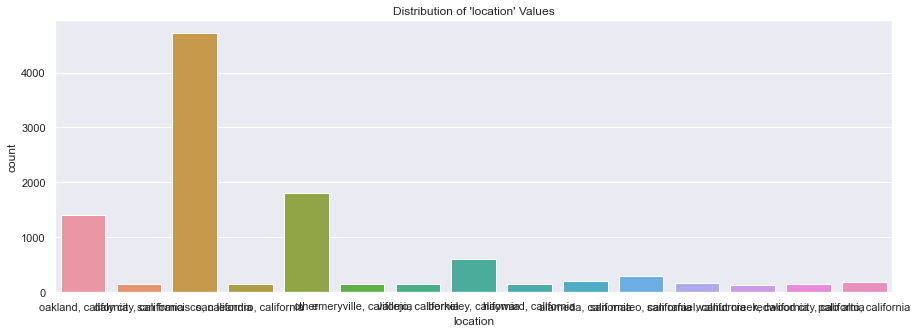

<Figure size 432x288 with 0 Axes>

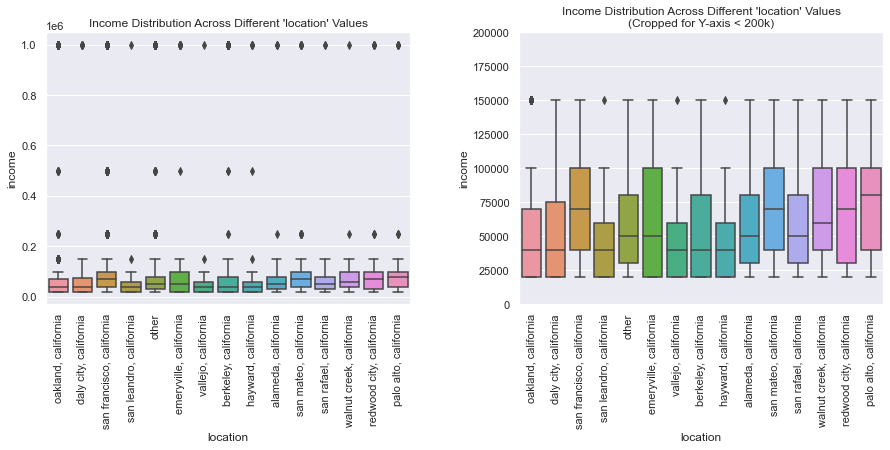

<Figure size 432x288 with 0 Axes>

In [52]:
plot_categorical('location') 

**Orientation**

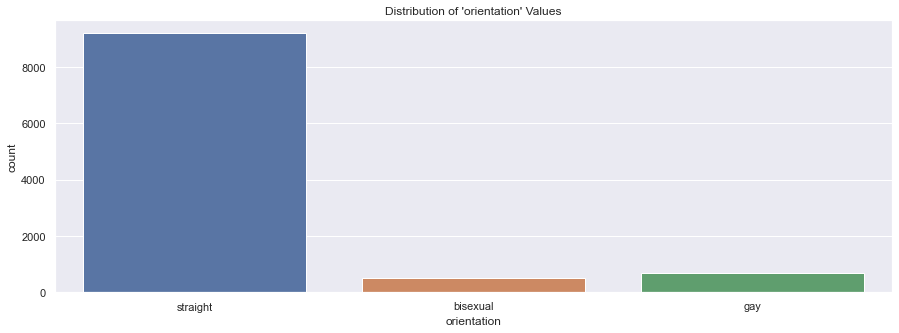

<Figure size 432x288 with 0 Axes>

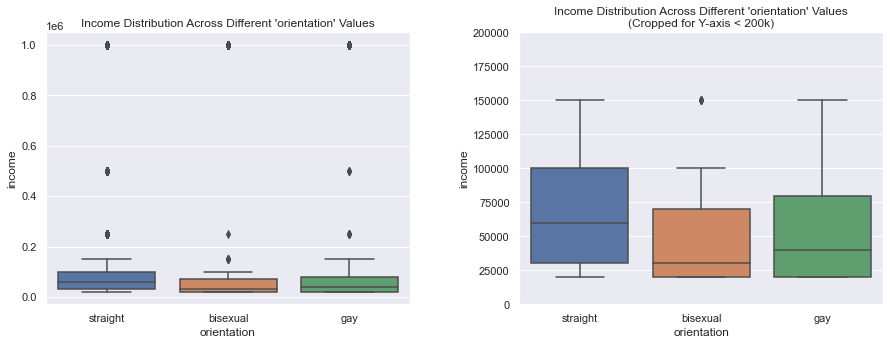

<Figure size 432x288 with 0 Axes>

In [53]:
plot_categorical('orientation') 

**Sex**

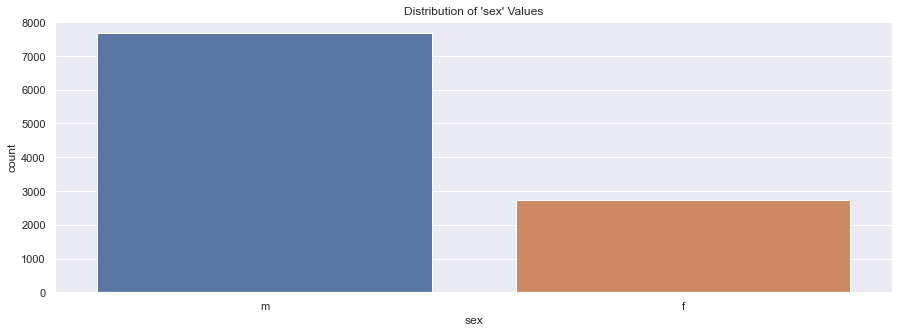

<Figure size 432x288 with 0 Axes>

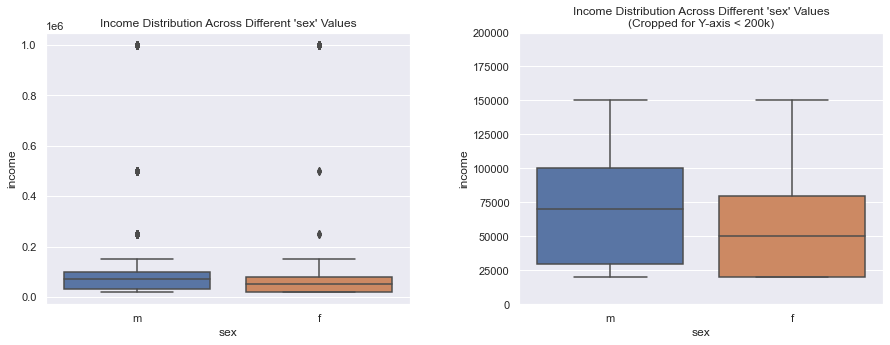

<Figure size 432x288 with 0 Axes>

In [54]:
plot_categorical('sex')

**Smokes**

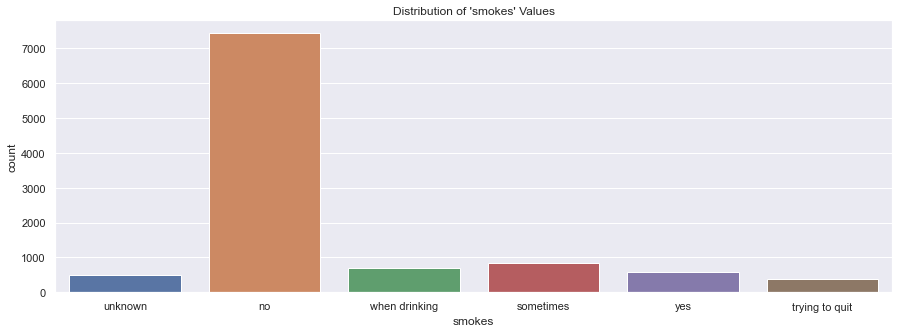

<Figure size 432x288 with 0 Axes>

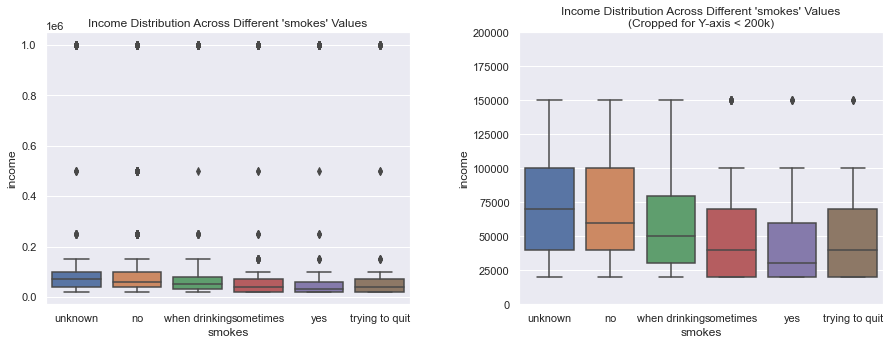

<Figure size 432x288 with 0 Axes>

In [55]:
order = ['unknown', 'no', 'when drinking', 'sometimes', 'yes', 'trying to quit']
plot_categorical('smokes', order=order) 

**Status**

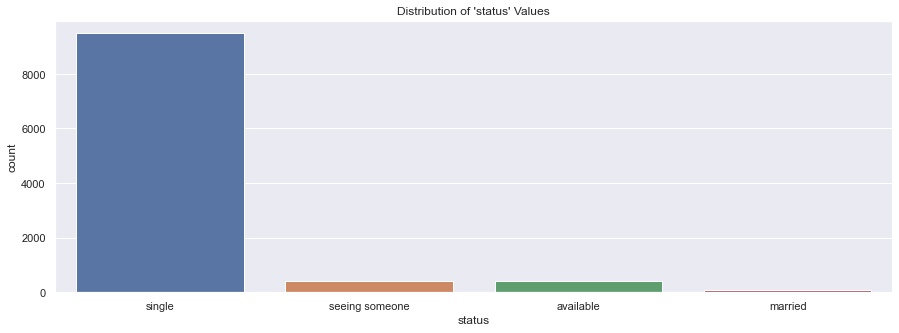

<Figure size 432x288 with 0 Axes>

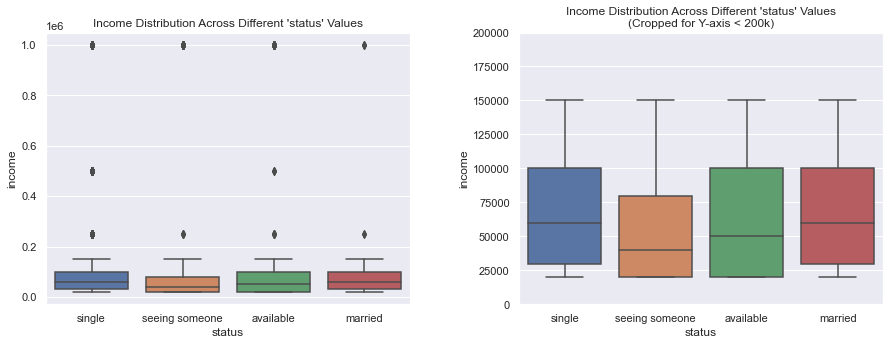

<Figure size 432x288 with 0 Axes>

In [56]:
plot_categorical('status')

**Speaks**

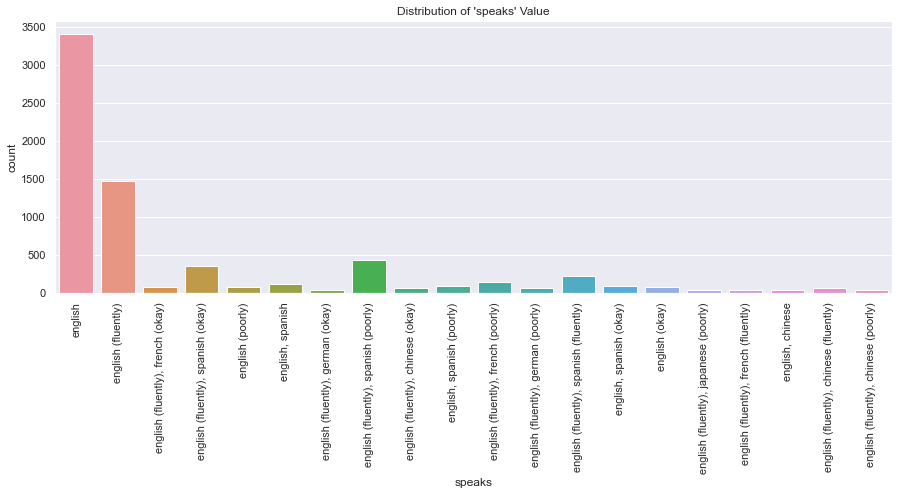

<Figure size 432x288 with 0 Axes>

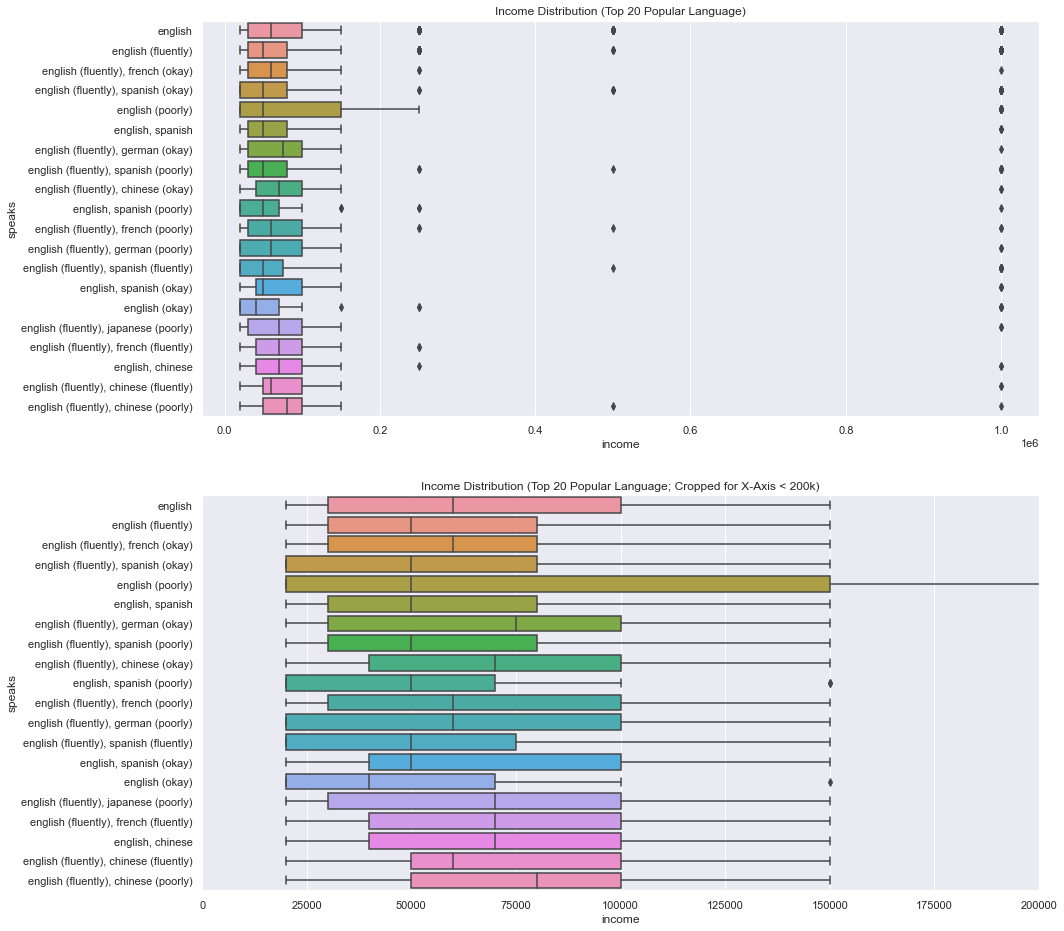

<Figure size 432x288 with 0 Axes>

In [57]:
speaks_top20 = df.speaks.value_counts().to_frame().iloc[0:20].index

# Show distribution of top 20 'speaks' values 
plt.figure(figsize=(15, 5))
sns.countplot(x='speaks', data=df[df.speaks.isin(speaks_top20)]).set(title='Distribution of \'speaks\' Value')
plt.xticks(rotation=90)
plt.show()
plt.clf()

plt.figure(figsize=(15, 16))

# Show income distribution of top 20 languages in a box plot
plt.subplot(2, 1, 1)
sns.boxplot(x='income', y='speaks', data=df[df.speaks.isin(speaks_top20)], orient='h').set(title='Income Distribution (Top 20 Popular Language)')

# Show income distribution of top 20 languages in a box plot (cropped for income less than 200k)
plt.subplot(2, 1, 2)
sns.boxplot(x='income', y='speaks', data=df[df.speaks.isin(speaks_top20)], orient='h').set(title='Income Distribution (Top 20 Popular Language; Cropped for X-Axis < 200k)')
plt.xlim(0, 200000)

plt.show()
plt.clf()

> In summary:
> - We find that there are high number of income outliers with 1 million incomes.
> - We find several characteristics that are associated with more income outliers, such as having 'jacked' or 'used up' body type, 'retired' (job), and 'desperately' (drinks).
> - We find that different values from each category have different income distribution, which are good for building a prediction model.

### 2. 4. Feature Engineering

**Dummy Variables**

In [58]:
# Create dummy variables for categorical variables, except 'speaks' because it needs different actions
df = pd.get_dummies(df, columns=df.drop(['age', 'income', 'speaks'], axis=1).columns, drop_first=True)

In [59]:
print('Total columns: ', len(df.columns))
df.columns.tolist()

Total columns:  109


['age',
 'income',
 'speaks',
 'body_type_athletic',
 'body_type_average',
 'body_type_curvy',
 'body_type_fit',
 'body_type_full figured',
 'body_type_jacked',
 'body_type_overweight',
 'body_type_rather not say',
 'body_type_skinny',
 'body_type_thin',
 'body_type_unknown',
 'body_type_used up',
 'drinks_not at all',
 'drinks_often',
 'drinks_rarely',
 'drinks_socially',
 'drinks_unknown',
 'drinks_very often',
 'drugs_often',
 'drugs_sometimes',
 'drugs_unknown',
 'education_dropped out of college/university',
 'education_dropped out of high school',
 'education_dropped out of law school',
 'education_dropped out of masters program',
 'education_dropped out of med school',
 'education_dropped out of ph.d program',
 'education_dropped out of space camp',
 'education_dropped out of two-year college',
 'education_graduated from college/university',
 'education_graduated from high school',
 'education_graduated from law school',
 'education_graduated from masters program',
 'education_g

In [60]:
# Split all 'speaks' entries and keep them in a series
languages = pd.Series(dtype='string')

for val in df.speaks:
    lang_series = pd.Series(pd.Series(val.split(', ')).unique())
    languages = pd.concat([languages, lang_series], ignore_index=True)
    
languages.head()

0        english (fluently)
1          spanish (poorly)
2           french (poorly)
3        english (fluently)
4    sign language (poorly)
dtype: object

In [61]:
# Create a dataframe containing counts and percentages of each single language
languages = languages.value_counts().to_frame()
languages.columns = ['count']
languages['percent'] = languages['count'] / languages['count'].sum()

languages[languages.percent >= 0.01]

,count,percent
english (fluently),5547,0.283763
english,4557,0.233118
spanish (poorly),1207,0.061745
spanish (okay),936,0.047882
french (poorly),631,0.032280
spanish (fluently),517,0.026448
french (okay),412,0.021076
german (poorly),284,0.014528
japanese (poorly),284,0.014528
english (okay),214,0.010947


In [62]:
import re

# Create dummy variables for languages with at least 1% proportion
for lang in languages[languages.percent >= 0.01].index:
    df[f'speaks_{lang}'] = (df.speaks.str.contains(re.escape(lang)+',|'+re.escape(lang)+'$'))*1

# Create a dummy variable named 'other' for other languages
for lang in languages[languages.percent < 0.01].index:
    df[f'speaks_other'] = (df.speaks.str.contains(re.escape(lang)+',|'+re.escape(lang)+'$'))*1

# Check the new columns
df.iloc[:5, -5:]  

,speaks_japanese (poorly),speaks_english (okay),speaks_spanish,speaks_french (fluently),speaks_other
1,0,0,0,0,0
11,0,0,0,0,0
13,0,0,0,0,0
14,0,0,0,0,0
43,0,1,0,0,0


In [63]:
# Find highly correlated features
corr_matrix = df.corr().unstack().abs()
for i in corr_matrix.index:
    if i[0] == i[1]:
        corr_matrix.drop(i, inplace=True)
corr_matrix.sort_values(ascending=False).iloc[:10]

speaks_english (fluently)            speaks_english                         0.926295
speaks_english                       speaks_english (fluently)              0.926295
orientation_gay                      orientation_straight                   0.738779
orientation_straight                 orientation_gay                        0.738779
status_seeing someone                status_single                          0.653832
status_single                        status_seeing someone                  0.653832
education_graduated from law school  job_law / legal services               0.563803
job_law / legal services             education_graduated from law school    0.563803
drinks_rarely                        drinks_socially                        0.518561
drinks_socially                      drinks_rarely                          0.518561
dtype: float64

Let us drop features that are highly correlated, one of every pair. We can also drop 'speaks' since we have made dummy variables of it.

In [64]:
df = df.drop(['speaks', 'speaks_english (fluently)', 'orientation_gay'] , axis=1)

**Scaling and Splitting Data**

Considering high number of outliers, we will prepare two sets of dataset:
1. Full dataset
2. Dataset without 1 million incomes

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# (x0, y0) - Full Dataset
x0 = df.drop(['income'], axis=1)
y0 = df['income']
x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, train_size=0.75, random_state=50)
scaler = ColumnTransformer([('std', StandardScaler(), ['age'])], remainder='passthrough') # Scale age column
x0_train_scaled = scaler.fit_transform(x0_train)
x0_test_scaled = scaler.fit_transform(x0_test)

# (x1, y1) - Dataset where income is less than or equal to 500000
x1 = df[df.income <= 500000].drop(['income'], axis=1)
y1 = df[df.income <= 500000]['income']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.75, random_state=50)
x1_train_scaled = scaler.fit_transform(x1_train)
x1_test_scaled = scaler.fit_transform(x1_test)

### 2. 5. Building ML Models

We will build the models using linear regression, gamma regression, negative binomial regression, and XGBoost.

In [66]:
# Import necessary libraries
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression, GammaRegressor, PoissonRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels
import statsmodels.api as sm

In [67]:
# A function to visualize comparison between prediction and actual value, also shows RMSE for evaluation
def performance_info(model, x_train, y_train, x_test, y_test, title=''):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    plt.figure(figsize=(15,5))
    plt.suptitle(title)
    
    # Create a line plot of predicted value against actual value to see how good the predictions are
    plt.subplot(1, 2, 1)
    sns.lineplot(x=y_test, y=y_pred_test).set(xlabel ="Actual Income", ylabel = "Predicted Income", title ='Actual Income vs Predicted Income')
    
    # Create a kde plot of predicted value and actual to compare both distributions
    plt.subplot(1, 2, 2)    
    density = pd.DataFrame({'y_pred': y_pred_test, 'y_true': y_test})
    sns.kdeplot(data=density).set(xlabel ="Income", title ='Distribution of Actual Income and Predicted Income')
    
    plt.show()
    plt.clf()   
    
    # Calculate RMSEs and each model's default evaluation metrics (except for NB)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    print(f'RMSE (train): {rmse_train}')
    
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    print(f'RMSE (test): {rmse_test}')
    
    if isinstance(model, statsmodels.genmod.generalized_linear_model.GLMResultsWrapper):
        pass
    else:
        score_train = model.score(x_train, y_train)
        print(f'Default Metric Score (train): {score_train}')

        score_test = model.score(x_test, y_test)
        print(f'Default Metric Score (test): {score_test}')

In [68]:
# Check labels basic statistics
print('Full Dataset\n', y0.describe(), '\n')
print('Dataset Excluding 1M\n', y1.describe())

Full Dataset
 count      10411.000000
mean      107364.326193
std       199367.847527
min        20000.000000
25%        30000.000000
50%        60000.000000
75%       100000.000000
max      1000000.000000
Name: income, dtype: float64 

Dataset Excluding 1M
 count      9946.000000
mean      65631.409612
std       51070.279308
min       20000.000000
25%       30000.000000
50%       50000.000000
75%       80000.000000
max      500000.000000
Name: income, dtype: float64


### **2. 5. 1. Linear Regression**

### **Full Dataset**

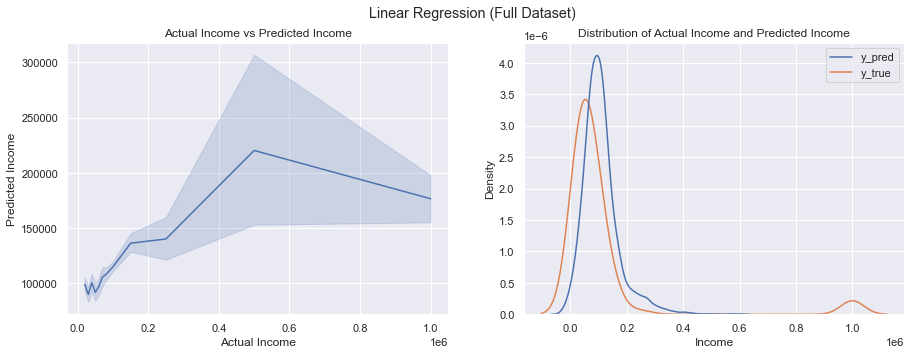

RMSE (train): 188463.85266700055
RMSE (test): 191689.82295823738
Default Metric Score (train): 0.10965263622071642
Default Metric Score (test): 0.06488002542816007


<Figure size 432x288 with 0 Axes>

In [69]:
lr0 = LinearRegression()
lr0.fit(x0_train_scaled, y0_train)

performance_info(lr0, x0_train_scaled, y0_train, x0_test_scaled, y0_test, 'Linear Regression (Full Dataset)')

### **Dataset without 1 Million Incomes**

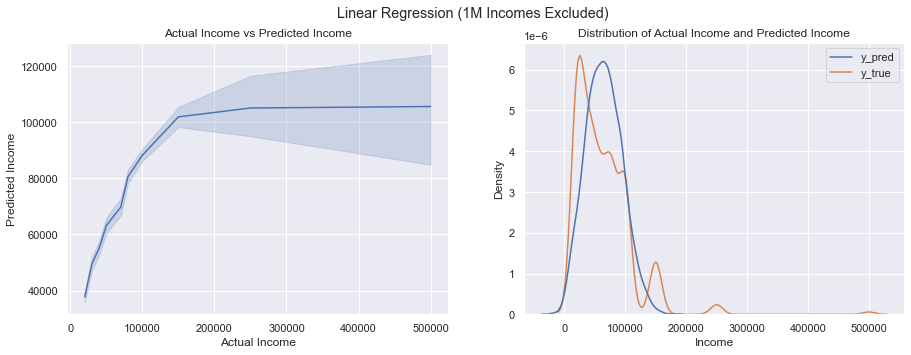

RMSE (train): 42891.30774820044
RMSE (test): 38203.315478704135
Default Metric Score (train): 0.32444637366314943
Default Metric Score (test): 0.3533921123481931


<Figure size 432x288 with 0 Axes>

In [70]:
lr1 = LinearRegression()
lr1.fit(x1_train_scaled, y1_train)

performance_info(lr1, x1_train_scaled, y1_train, x1_test_scaled, y1_test, 'Linear Regression (1M Incomes Excluded)')

> In summary:
> - For full dataset, we got a RMSE score 191689 and the default metric ($R^{2}$ score) was 0.0649.
> - For second dataset, we got a RMSE score 38203 and the default metric ($R^{2}$ score) was 0.3534.

### **2. 5. 2. Negative Binomial**

### **Full Dataset**

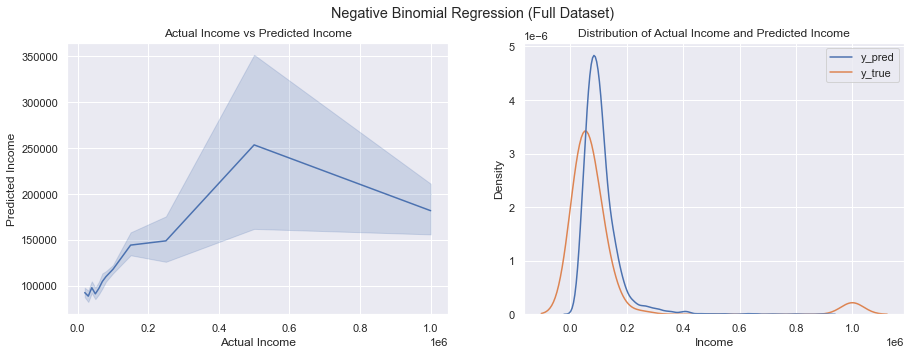

RMSE (train): 188892.29149145575
RMSE (test): 190140.7010633703


<Figure size 432x288 with 0 Axes>

In [71]:
x0_train_nb = pd.DataFrame(x0_train_scaled, columns = x0.columns)
y0_train_nb = pd.DataFrame(y0_train).reset_index(drop=True)
x0_test_nb = pd.DataFrame(x0_test_scaled, columns = x0.columns)
y0_test_nb = pd.DataFrame(y0_test).reset_index(drop=True)

new_col_names = []
for name in x0.columns:
    new_col_names.append(name.replace(' ', '_').replace('/', 'or').replace(',', '').replace('.', '').replace('-', '').replace('+', '').replace('(', '').replace(')', ''))
x0_train_nb.columns = new_col_names
x0_test_nb.columns = new_col_names

x0_train_nb.insert(loc=0, column='Intercept', value=1.0)
x0_test_nb.insert(loc=0, column='Intercept', value=1.0)

nb0 = sm.GLM(y0_train_nb, x0_train_nb, family=sm.families.NegativeBinomial()).fit()
performance_info(nb0, x0_train_nb, y0_train_nb, x0_test_nb, y0_test_nb.income, 'Negative Binomial Regression (Full Dataset)')


### **Dataset without 1 Million Incomes**

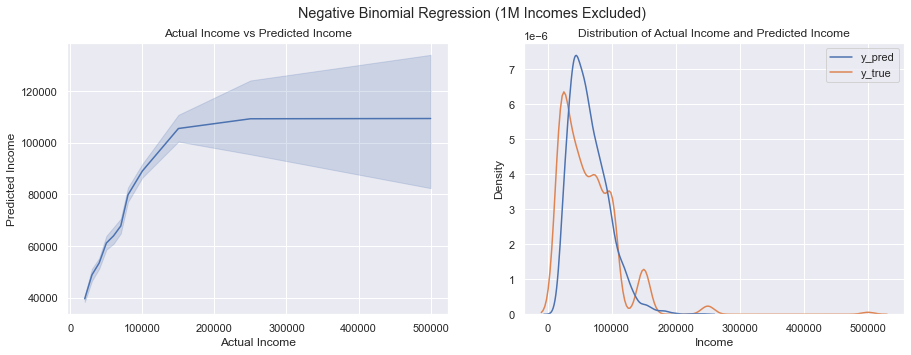

RMSE (train): 42639.98064821424
RMSE (test): 37846.98629405009


<Figure size 432x288 with 0 Axes>

In [72]:
x1_train_nb = pd.DataFrame(x1_train_scaled, columns = x1.columns)
y1_train_nb = pd.DataFrame(y1_train).reset_index(drop=True)
x1_test_nb = pd.DataFrame(x1_test_scaled, columns = x1.columns)
y1_test_nb = pd.DataFrame(y1_test).reset_index(drop=True)

new_col_names = []
for name in x1.columns:
    new_col_names.append(name.replace(' ', '_').replace('/', 'or').replace(',', '').replace('.', '').replace('-', '').replace('+', '').replace('(', '').replace(')', ''))
x1_train_nb.columns = new_col_names
x1_test_nb.columns = new_col_names

x1_train_nb.insert(loc=0, column='Intercept', value=1.0)
x1_test_nb.insert(loc=0, column='Intercept', value=1.0)

nb1 = sm.GLM(y1_train_nb, x1_train_nb, family=sm.families.NegativeBinomial()).fit(maxiter=1000)
performance_info(nb1, x1_train_nb, y1_train_nb, x1_test_nb, y1_test_nb.income, 'Negative Binomial Regression (1M Incomes Excluded)')

> In summary:
> - For full dataset, we got a RMSE score 190140.
> - For second dataset, we got a RMSE score 37846.

### **2. 5. 3. Gamma Regressor**

### **Full Dataset**

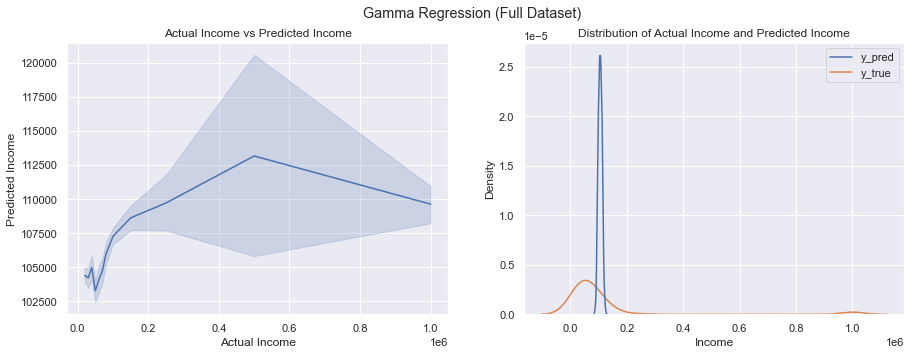

RMSE (train): 198410.87874661002
RMSE (test): 197173.44690813683
Default Metric Score (train): 0.03854267589885396
Default Metric Score (test): 0.0305476495651682


<Figure size 432x288 with 0 Axes>

In [73]:
gr0 = GammaRegressor()
gr0.fit(x0_train_scaled, y0_train)

performance_info(gr0, x0_train_scaled, y0_train, x0_test_scaled, y0_test, 'Gamma Regression (Full Dataset)')

**a. Tuning Alpha**

In [74]:
param_test1 = {'alpha': [1e-3, 1e-2, 0.1, 1, 10, 100]}

gr0 = GammaRegressor()

gs0 = GridSearchCV(estimator = gr0, param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs0.fit(x0_train_scaled, y0_train)
display(pd.DataFrame({'mean_test_score': gs0.cv_results_['mean_test_score'] , 'std_test_score': gs0.cv_results_['std_test_score'], 'params': gs0.cv_results_['params']}))
print('Best Parameters:', gs0.best_params_)
print('RMSE: ', (gs0.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-3.711946e+10,2.199162e+09,{'alpha': 0.001}
1,-3.703588e+10,2.379337e+09,{'alpha': 0.01}
2,-3.829661e+10,2.559430e+09,{'alpha': 0.1}
3,-3.943233e+10,2.581653e+09,{'alpha': 1}
4,-3.983451e+10,2.564744e+09,{'alpha': 10}
5,-3.989104e+10,2.562000e+09,{'alpha': 100}


Best Parameters: {'alpha': 0.01}
RMSE:  192447.08116326862


In [75]:
param_test2 = {'alpha': [i/1000 for i in range(5, 51, 5)]}

gr0 = GammaRegressor()

gs0 = GridSearchCV(estimator = gr0, param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs0.fit(x0_train_scaled, y0_train)
display(pd.DataFrame({'mean_test_score': gs0.cv_results_['mean_test_score'] , 'std_test_score': gs0.cv_results_['std_test_score'], 'params': gs0.cv_results_['params']}))
print('Best Parameters:', gs0.best_params_)
print('RMSE: ', (gs0.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-3.689785e+10,2.332628e+09,{'alpha': 0.005}
1,-3.703588e+10,2.379337e+09,{'alpha': 0.01}
2,-3.719551e+10,2.409001e+09,{'alpha': 0.015}
3,-3.733624e+10,2.432792e+09,{'alpha': 0.02}
4,-3.745785e+10,2.452786e+09,{'alpha': 0.025}
5,-3.756327e+10,2.468655e+09,{'alpha': 0.03}
6,-3.765565e+10,2.482035e+09,{'alpha': 0.035}
7,-3.773690e+10,2.494183e+09,{'alpha': 0.04}
8,-3.780906e+10,2.503919e+09,{'alpha': 0.045}
9,-3.787388e+10,2.512395e+09,{'alpha': 0.05}


Best Parameters: {'alpha': 0.005}
RMSE:  192088.1401521468


In [76]:
param_test3 = {'alpha': [i/1000 for i in range(3, 8)]}

gr0 = GammaRegressor()

gs0 = GridSearchCV(estimator = gr0, param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs0.fit(x0_train_scaled, y0_train)
display(pd.DataFrame({'mean_test_score': gs0.cv_results_['mean_test_score'] , 'std_test_score': gs0.cv_results_['std_test_score'], 'params': gs0.cv_results_['params']}))
print('Best Parameters:', gs0.best_params_)
print('RMSE: ', (gs0.best_score_ * -1)**0.5)


,mean_test_score,std_test_score,params
0,-3.690707e+10,2.295133e+09,{'alpha': 0.003}
1,-3.689298e+10,2.315041e+09,{'alpha': 0.004}
2,-3.689785e+10,2.332628e+09,{'alpha': 0.005}
3,-3.691586e+10,2.344765e+09,{'alpha': 0.006}
4,-3.694170e+10,2.354009e+09,{'alpha': 0.007}


Best Parameters: {'alpha': 0.004}
RMSE:  192075.44513525334


**b. Final Model**

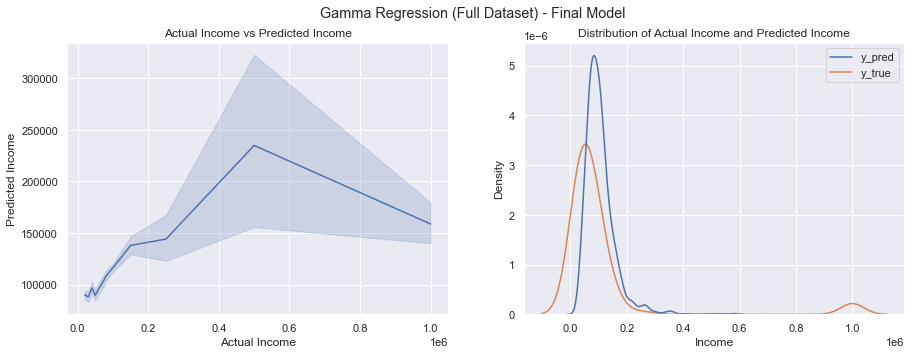

RMSE (train): 189056.9473144014
RMSE (test): 190392.56416878337
Default Metric Score (train): 0.2200341679263813
Default Metric Score (test): 0.12318320797042193


<Figure size 432x288 with 0 Axes>

In [77]:
gr0 = GammaRegressor(alpha=0.004)
gr0.fit(x0_train_scaled, y0_train)

performance_info(gr0, x0_train_scaled, y0_train, x0_test_scaled, y0_test, 'Gamma Regression (Full Dataset) - Final Model')

### **Dataset without 1 Million Incomes**

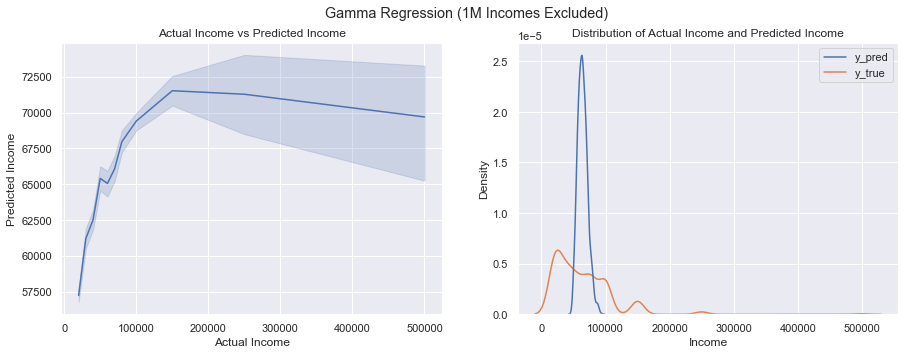

RMSE (train): 49404.397674175016
RMSE (test): 44272.97215984935
Default Metric Score (train): 0.14985795143091052
Default Metric Score (test): 0.16431626048055348


<Figure size 432x288 with 0 Axes>

In [78]:
gr1 = GammaRegressor()
gr1.fit(x1_train_scaled, y1_train)

performance_info(gr1, x1_train_scaled, y1_train, x1_test_scaled, y1_test, 'Gamma Regression (1M Incomes Excluded)')

**a. Tuning Alpha**

In [79]:
param_test1 = {'alpha': [1e-3, 1e-2, 0.1, 1, 10, 100]}

gr1 = GammaRegressor()

gs1 = GridSearchCV(estimator = gr1, 
 param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.900284e+09,3.059124e+08,{'alpha': 0.001}
1,-1.916031e+09,3.189516e+08,{'alpha': 0.01}
2,-2.085195e+09,3.347519e+08,{'alpha': 0.1}
3,-2.445452e+09,3.271533e+08,{'alpha': 1}
4,-2.675446e+09,3.169867e+08,{'alpha': 10}
5,-2.718482e+09,3.151954e+08,{'alpha': 100}


Best Parameters: {'alpha': 0.001}
RMSE:  43592.252226011544


In [80]:
param_test2 = {'alpha': [1e-5, 1e-4, 5e-4, 1e-3, 5e-3]}

gr1 = GammaRegressor()

gs1 = GridSearchCV(estimator = gr1, 
 param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.909958e+09,2.974344e+08,{'alpha': 1e-05}
1,-1.907893e+09,2.997048e+08,{'alpha': 0.0001}
2,-1.902989e+09,3.035614e+08,{'alpha': 0.0005}
3,-1.900284e+09,3.059124e+08,{'alpha': 0.001}
4,-1.902600e+09,3.137618e+08,{'alpha': 0.005}


Best Parameters: {'alpha': 0.001}
RMSE:  43592.252226011544


In [81]:
param_test3 = {'alpha': [0.0075, 0.001, 0.002, 0.003, 0.004]}

gr1 = GammaRegressor()

gs1 = GridSearchCV(estimator = gr1, 
 param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.908861e+09,3.166523e+08,{'alpha': 0.0075}
1,-1.900284e+09,3.059124e+08,{'alpha': 0.001}
2,-1.898536e+09,3.088864e+08,{'alpha': 0.002}
3,-1.898964e+09,3.105893e+08,{'alpha': 0.003}
4,-1.900568e+09,3.122199e+08,{'alpha': 0.004}


Best Parameters: {'alpha': 0.002}
RMSE:  43572.191747321296


**b. Final Model**

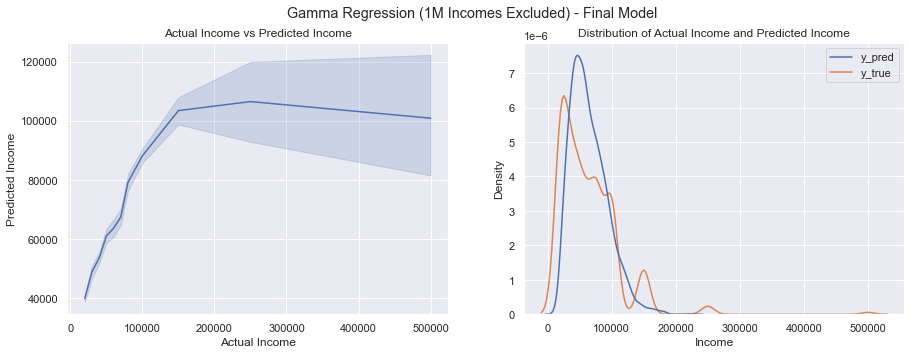

RMSE (train): 42734.16255316501
RMSE (test): 37775.50451930261
Default Metric Score (train): 0.4518661812203024
Default Metric Score (test): 0.471282408254481


<Figure size 432x288 with 0 Axes>

In [82]:
gr1 = GammaRegressor(alpha=0.002)
gr1.fit(x1_train_scaled, y1_train)

performance_info(gr1, x1_train_scaled, y1_train, x1_test_scaled, y1_test, 'Gamma Regression (1M Incomes Excluded) - Final Model')

> In summary:
> - For full dataset, we got a RMSE score 190392 and the default metric ($D^{2}$ score) was 0.1232.
> - For second dataset, we got a RMSE score 37775 and the default metric ($D^{2}$ score) was 0.4713.

### **2. 5. 4. XGBoost**

### **Full Dataset**

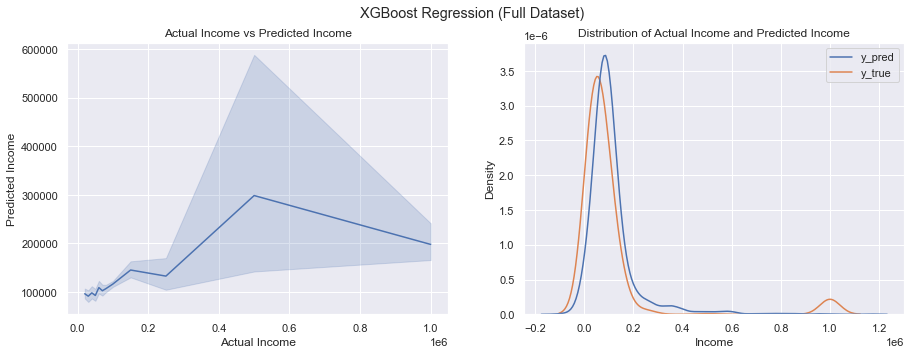

RMSE (train): 108879.93591388197
RMSE (test): 204145.48547877825
Default Metric Score (train): 0.7028340397256787
Default Metric Score (test): -0.06059306202571424


<Figure size 432x288 with 0 Axes>

In [83]:
xgb0 = XGBRegressor()
xgb0.fit(x0_train_scaled, y0_train)

performance_info(xgb0, x0_train_scaled, y0_train, x0_test_scaled, y0_test, 'XGBoost Regression (Full Dataset)')

**a. Initial Tuning**

n_estimators = 61


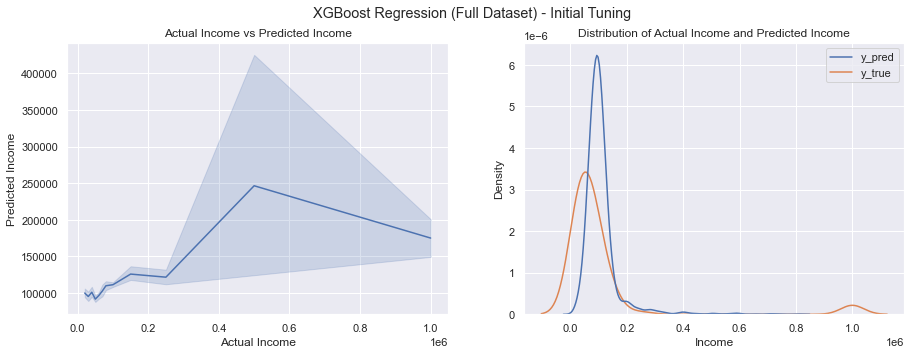

RMSE (train): 168023.9529319861
RMSE (test): 191975.59250502498
Default Metric Score (train): 0.292305626621839
Default Metric Score (test): 0.062089809459358825


<Figure size 432x288 with 0 Axes>

In [84]:
xgb0 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 random_state=50)

xgb_param = xgb0.get_xgb_params()
xgtrain = xgb.DMatrix(x0_train_scaled, label=y0_train)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb0.get_params()['n_estimators'], nfold=5,
    metrics='rmse', early_stopping_rounds=50)
print('n_estimators =', cvresult.shape[0])
xgb0.set_params(n_estimators=cvresult.shape[0])
    
xgb0.fit(x0_train_scaled, y0_train)

performance_info(xgb0, x0_train_scaled, y0_train, x0_test_scaled, y0_test, 'XGBoost Regression (Full Dataset) - Initial Tuning')

**b. Tuning `max_depth` and `min_child_weight`**

In [85]:
xgb0 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=61,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 random_state=50)

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gs0 = GridSearchCV(estimator = xgb0, param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs0.fit(x0_train_scaled, y0_train)
display(pd.DataFrame({'mean_test_score': gs0.cv_results_['mean_test_score'] , 'std_test_score': gs0.cv_results_['std_test_score'], 'params': gs0.cv_results_['params']}))
print('Best Parameters:', gs0.best_params_)
print('RMSE: ', (gs0.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-3.699674e+10,2.531162e+09,"{'max_depth': 3, 'min_child_weight': 1}"
1,-3.704454e+10,2.384970e+09,"{'max_depth': 3, 'min_child_weight': 3}"
2,-3.691973e+10,2.671417e+09,"{'max_depth': 3, 'min_child_weight': 5}"
3,-3.755471e+10,2.445491e+09,"{'max_depth': 5, 'min_child_weight': 1}"
4,-3.741453e+10,2.496596e+09,"{'max_depth': 5, 'min_child_weight': 3}"
5,-3.712565e+10,2.614070e+09,"{'max_depth': 5, 'min_child_weight': 5}"
6,-3.813543e+10,2.551052e+09,"{'max_depth': 7, 'min_child_weight': 1}"
7,-3.820234e+10,2.668829e+09,"{'max_depth': 7, 'min_child_weight': 3}"
8,-3.798349e+10,2.859322e+09,"{'max_depth': 7, 'min_child_weight': 5}"
9,-3.899364e+10,2.907462e+09,"{'max_depth': 9, 'min_child_weight': 1}"


Best Parameters: {'max_depth': 3, 'min_child_weight': 5}
RMSE:  192145.07867423276


In [86]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4, 5, 6, 8, 10]
}

gs0 = GridSearchCV(estimator = xgb0, param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs0.fit(x0_train_scaled, y0_train)
display(pd.DataFrame({'mean_test_score': gs0.cv_results_['mean_test_score'] , 'std_test_score': gs0.cv_results_['std_test_score'], 'params': gs0.cv_results_['params']}))
print('Best Parameters:', gs0.best_params_)
print('RMSE: ', (gs0.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-3.704635e+10,2.448524e+09,"{'max_depth': 2, 'min_child_weight': 4}"
1,-3.702434e+10,2.514899e+09,"{'max_depth': 2, 'min_child_weight': 5}"
2,-3.703219e+10,2.529891e+09,"{'max_depth': 2, 'min_child_weight': 6}"
3,-3.706213e+10,2.502975e+09,"{'max_depth': 2, 'min_child_weight': 8}"
4,-3.704013e+10,2.593654e+09,"{'max_depth': 2, 'min_child_weight': 10}"
5,-3.711531e+10,2.468787e+09,"{'max_depth': 3, 'min_child_weight': 4}"
6,-3.691973e+10,2.671417e+09,"{'max_depth': 3, 'min_child_weight': 5}"
7,-3.698553e+10,2.587899e+09,"{'max_depth': 3, 'min_child_weight': 6}"
8,-3.702695e+10,2.561115e+09,"{'max_depth': 3, 'min_child_weight': 8}"
9,-3.701637e+10,2.612845e+09,"{'max_depth': 3, 'min_child_weight': 10}"


Best Parameters: {'max_depth': 3, 'min_child_weight': 5}
RMSE:  192145.07867423276


**c. Tuning `gamma`**

In [87]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

xgb0 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=61,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 random_state=50)

gs0 = GridSearchCV(estimator = xgb0, param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs0.fit(x0_train_scaled, y0_train)
display(pd.DataFrame({'mean_test_score': gs0.cv_results_['mean_test_score'] , 'std_test_score': gs0.cv_results_['std_test_score'], 'params': gs0.cv_results_['params']}))
print('Best Parameters:', gs0.best_params_)
print('RMSE: ', (gs0.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-3.691973e+10,2.671417e+09,{'gamma': 0.0}
1,-3.691973e+10,2.671417e+09,{'gamma': 0.1}
2,-3.691973e+10,2.671417e+09,{'gamma': 0.2}
3,-3.691973e+10,2.671417e+09,{'gamma': 0.3}
4,-3.691973e+10,2.671417e+09,{'gamma': 0.4}


Best Parameters: {'gamma': 0.0}
RMSE:  192145.07867423276


n_estimators = 113


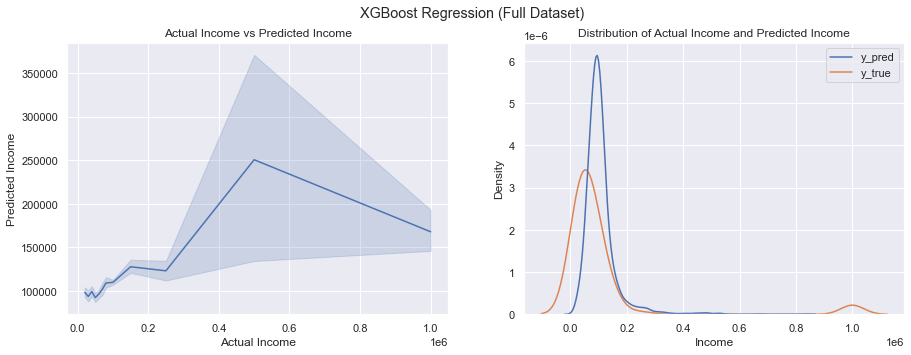

RMSE (train): 180038.1434647127
RMSE (test): 191428.2384730462
Default Metric Score (train): 0.1874831071408034
Default Metric Score (test): 0.06743045790388569


<Figure size 432x288 with 0 Axes>

In [88]:
xgb0 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 random_state=50)

xgb_param = xgb0.get_xgb_params()
xgtrain = xgb.DMatrix(x0_train_scaled, label=y0_train)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb0.get_params()['n_estimators'], nfold=5,
    metrics='rmse', early_stopping_rounds=50)
print('n_estimators =', cvresult.shape[0])
xgb0.set_params(n_estimators=cvresult.shape[0])

xgb0.fit(x0_train_scaled, y0_train)
performance_info(xgb0, x0_train_scaled, y0_train, x0_test_scaled, y0_test, 'XGBoost Regression (Full Dataset)')

**d. Tuning `subsample` and `colsample_bytree`**

In [89]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

xgb0 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=113,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 random_state=50)

gs0 = GridSearchCV(estimator = xgb0, param_grid = param_test4, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs0.fit(x0_train_scaled, y0_train)
display(pd.DataFrame({'mean_test_score': gs0.cv_results_['mean_test_score'] , 'std_test_score': gs0.cv_results_['std_test_score'], 'params': gs0.cv_results_['params']}))
print('Best Parameters:', gs0.best_params_)
print('RMSE: ', (gs0.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-3.725592e+10,2.801918e+09,"{'colsample_bytree': 0.6, 'subsample': 0.6}"
1,-3.704086e+10,2.920588e+09,"{'colsample_bytree': 0.6, 'subsample': 0.7}"
2,-3.698170e+10,2.558684e+09,"{'colsample_bytree': 0.6, 'subsample': 0.8}"
3,-3.681623e+10,2.719115e+09,"{'colsample_bytree': 0.6, 'subsample': 0.9}"
4,-3.713985e+10,2.721599e+09,"{'colsample_bytree': 0.7, 'subsample': 0.6}"
5,-3.710297e+10,2.858286e+09,"{'colsample_bytree': 0.7, 'subsample': 0.7}"
6,-3.697923e+10,2.672189e+09,"{'colsample_bytree': 0.7, 'subsample': 0.8}"
7,-3.682661e+10,2.665265e+09,"{'colsample_bytree': 0.7, 'subsample': 0.9}"
8,-3.719896e+10,2.565794e+09,"{'colsample_bytree': 0.8, 'subsample': 0.6}"
9,-3.720905e+10,2.672612e+09,"{'colsample_bytree': 0.8, 'subsample': 0.7}"


Best Parameters: {'colsample_bytree': 0.6, 'subsample': 0.9}
RMSE:  191875.56260307066


In [90]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,101,5)],
 'colsample_bytree':[0.6, 0.65]
}

gs0 = GridSearchCV(estimator = xgb0, param_grid = param_test5, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs0.fit(x0_train_scaled, y0_train)
display(pd.DataFrame({'mean_test_score': gs0.cv_results_['mean_test_score'] , 'std_test_score': gs0.cv_results_['std_test_score'], 'params': gs0.cv_results_['params']}))
print('Best Parameters:', gs0.best_params_)
print('RMSE: ', (gs0.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-3.711107e+10,2.722587e+09,"{'colsample_bytree': 0.6, 'subsample': 0.85}"
1,-3.681623e+10,2.719115e+09,"{'colsample_bytree': 0.6, 'subsample': 0.9}"
2,-3.687747e+10,2.652868e+09,"{'colsample_bytree': 0.6, 'subsample': 0.95}"
3,-3.676328e+10,2.607285e+09,"{'colsample_bytree': 0.6, 'subsample': 1.0}"
4,-3.692295e+10,2.738425e+09,"{'colsample_bytree': 0.65, 'subsample': 0.85}"
5,-3.683192e+10,2.762516e+09,"{'colsample_bytree': 0.65, 'subsample': 0.9}"
6,-3.698540e+10,2.648466e+09,"{'colsample_bytree': 0.65, 'subsample': 0.95}"
7,-3.695941e+10,2.725579e+09,"{'colsample_bytree': 0.65, 'subsample': 1.0}"


Best Parameters: {'colsample_bytree': 0.6, 'subsample': 1.0}
RMSE:  191737.5261368585


**e. Tuning `reg_alpha` and `reg_lambda`**

In [91]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda': [1e-5, 1e-2, 0.1, 1, 100]
}

xgb0 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=113,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 colsample_bytree=0.6,
 random_state=50)

gs0 = GridSearchCV(estimator = xgb0, param_grid = param_test6, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs0.fit(x0_train_scaled, y0_train)
display(pd.DataFrame({'mean_test_score': gs0.cv_results_['mean_test_score'] , 'std_test_score': gs0.cv_results_['std_test_score'], 'params': gs0.cv_results_['params']}))
print('Best Parameters:', gs0.best_params_)
print('RMSE: ', (gs0.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-3.689986e+10,2.579471e+09,"{'reg_alpha': 1e-05, 'reg_lambda': 1e-05}"
1,-3.686604e+10,2.570045e+09,"{'reg_alpha': 1e-05, 'reg_lambda': 0.01}"
2,-3.685917e+10,2.545292e+09,"{'reg_alpha': 1e-05, 'reg_lambda': 0.1}"
3,-3.676328e+10,2.607285e+09,"{'reg_alpha': 1e-05, 'reg_lambda': 1}"
4,-3.710257e+10,2.411450e+09,"{'reg_alpha': 1e-05, 'reg_lambda': 100}"
5,-3.689986e+10,2.579471e+09,"{'reg_alpha': 0.01, 'reg_lambda': 1e-05}"
6,-3.686604e+10,2.570045e+09,"{'reg_alpha': 0.01, 'reg_lambda': 0.01}"
7,-3.685917e+10,2.545292e+09,"{'reg_alpha': 0.01, 'reg_lambda': 0.1}"
8,-3.676328e+10,2.607285e+09,"{'reg_alpha': 0.01, 'reg_lambda': 1}"
9,-3.710257e+10,2.411450e+09,"{'reg_alpha': 0.01, 'reg_lambda': 100}"


Best Parameters: {'reg_alpha': 100, 'reg_lambda': 1}
RMSE:  191737.50672069515


In [92]:
param_test7 = {
 'reg_alpha': [80, 90, 100, 120, 150],
 'reg_lambda': [0.5, 1, 3, 10]
}

gs0 = GridSearchCV(estimator = xgb0, param_grid = param_test7, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs0.fit(x0_train_scaled, y0_train)
display(pd.DataFrame({'mean_test_score': gs0.cv_results_['mean_test_score'] , 'std_test_score': gs0.cv_results_['std_test_score'], 'params': gs0.cv_results_['params']}))
print('Best Parameters:', gs0.best_params_)
print('RMSE: ', (gs0.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-3.703211e+10,2.469954e+09,"{'reg_alpha': 80, 'reg_lambda': 0.5}"
1,-3.676327e+10,2.607285e+09,"{'reg_alpha': 80, 'reg_lambda': 1}"
2,-3.686958e+10,2.418871e+09,"{'reg_alpha': 80, 'reg_lambda': 3}"
3,-3.677609e+10,2.537542e+09,"{'reg_alpha': 80, 'reg_lambda': 10}"
4,-3.703211e+10,2.469955e+09,"{'reg_alpha': 90, 'reg_lambda': 0.5}"
5,-3.676327e+10,2.607285e+09,"{'reg_alpha': 90, 'reg_lambda': 1}"
6,-3.686958e+10,2.418871e+09,"{'reg_alpha': 90, 'reg_lambda': 3}"
7,-3.677609e+10,2.537542e+09,"{'reg_alpha': 90, 'reg_lambda': 10}"
8,-3.703211e+10,2.469956e+09,"{'reg_alpha': 100, 'reg_lambda': 0.5}"
9,-3.676327e+10,2.607285e+09,"{'reg_alpha': 100, 'reg_lambda': 1}"


Best Parameters: {'reg_alpha': 120, 'reg_lambda': 1}
RMSE:  191737.50288495558


In [93]:
param_test8 = {
 'reg_alpha':[110, 120, 130],
 'reg_lambda': [0.75, 1, 1.25]
}

gs0 = GridSearchCV(estimator = xgb0, param_grid = param_test8, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs0.fit(x0_train_scaled, y0_train)
display(pd.DataFrame({'mean_test_score': gs0.cv_results_['mean_test_score'] , 'std_test_score': gs0.cv_results_['std_test_score'], 'params': gs0.cv_results_['params']}))
print('Best Parameters:', gs0.best_params_)
print('RMSE: ', (gs0.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-3.695879e+10,2.604553e+09,"{'reg_alpha': 110, 'reg_lambda': 0.75}"
1,-3.676327e+10,2.607285e+09,"{'reg_alpha': 110, 'reg_lambda': 1}"
2,-3.685005e+10,2.422334e+09,"{'reg_alpha': 110, 'reg_lambda': 1.25}"
3,-3.695879e+10,2.604553e+09,"{'reg_alpha': 120, 'reg_lambda': 0.75}"
4,-3.676327e+10,2.607285e+09,"{'reg_alpha': 120, 'reg_lambda': 1}"
5,-3.685005e+10,2.422334e+09,"{'reg_alpha': 120, 'reg_lambda': 1.25}"
6,-3.695879e+10,2.604553e+09,"{'reg_alpha': 130, 'reg_lambda': 0.75}"
7,-3.677596e+10,2.618878e+09,"{'reg_alpha': 130, 'reg_lambda': 1}"
8,-3.685005e+10,2.422335e+09,"{'reg_alpha': 130, 'reg_lambda': 1.25}"


Best Parameters: {'reg_alpha': 120, 'reg_lambda': 1}
RMSE:  191737.50288495558


n_estimators = 1485


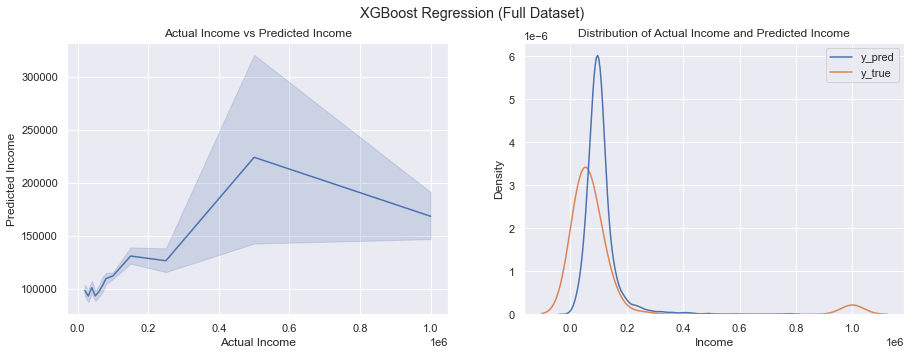

RMSE (train): 180335.26469272922
RMSE (test): 190908.53312463962
Default Metric Score (train): 0.18479906230856225
Default Metric Score (test): 0.07248721946718828


<Figure size 432x288 with 0 Axes>

In [94]:
xgb0 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 colsample_bytree=0.6,
 reg_alpha = 120,
 reg_lambda = 1,
 random_state=50)

xgb_param = xgb0.get_xgb_params()
xgtrain = xgb.DMatrix(x0_train_scaled, label=y0_train)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb0.get_params()['n_estimators'], nfold=5,
    metrics='rmse', early_stopping_rounds=50)
print('n_estimators =', cvresult.shape[0])
xgb0.set_params(n_estimators=cvresult.shape[0])
    
xgb0.fit(x0_train_scaled, y0_train)
performance_info(xgb0, x0_train_scaled, y0_train, x0_test_scaled, y0_test, 'XGBoost Regression (Full Dataset)')

**f. Final Model**

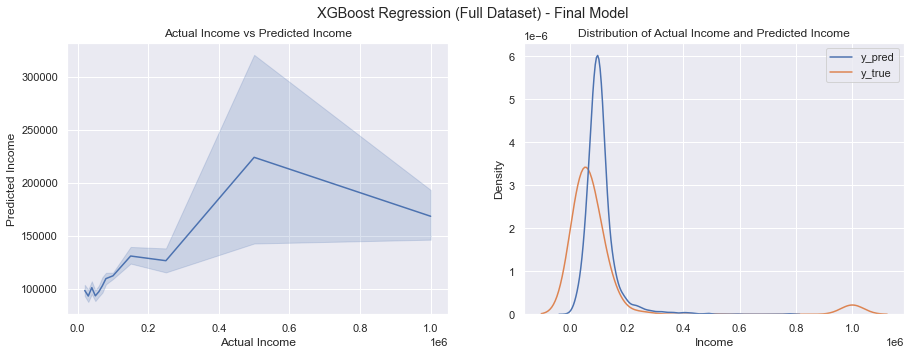

RMSE (train): 180335.26469272922
RMSE (test): 190908.53312463962
Default Metric Score (train): 0.18479906230856225
Default Metric Score (test): 0.07248721946718828


<Figure size 432x288 with 0 Axes>

In [95]:
xgb0 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=1485,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 colsample_bytree=0.6,
 reg_alpha = 120,
 reg_lambda = 1,
 random_state=50)
 
xgb0.fit(x0_train_scaled, y0_train)
performance_info(xgb0, x0_train_scaled, y0_train, x0_test_scaled, y0_test, 'XGBoost Regression (Full Dataset) - Final Model')

### **Dataset without 1 Million Incomes**

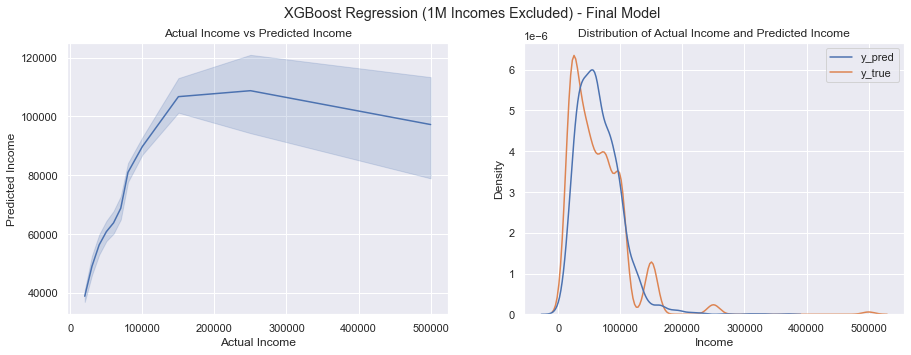

RMSE (train): 25083.130613182693
RMSE (test): 41960.08575097489
Default Metric Score (train): 0.7689612996742534
Default Metric Score (test): 0.21996943155202242


<Figure size 432x288 with 0 Axes>

In [96]:
xgb1 = XGBRegressor()
xgb1.fit(x1_train_scaled, y1_train)

performance_info(xgb1, x1_train_scaled, y1_train, x1_test_scaled, y1_test, 'XGBoost Regression (1M Incomes Excluded) - Final Model')

**a. Initial Tuning**

n_estimators = 68


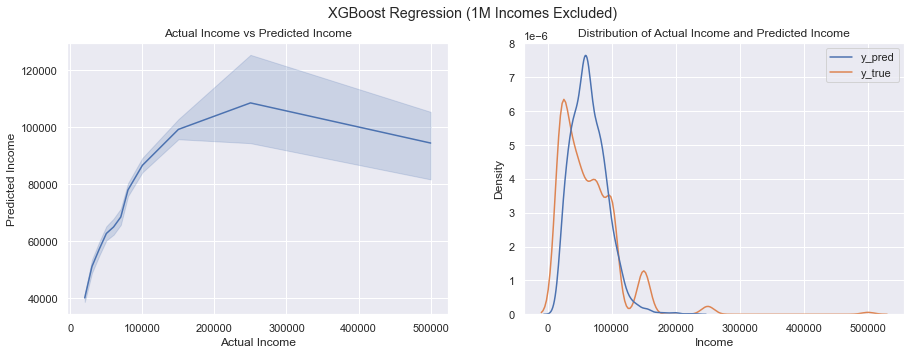

RMSE (train): 36469.891333769454
RMSE (test): 38567.0633357449
Default Metric Score (train): 0.5115836517927916
Default Metric Score (test): 0.3410203087953033


<Figure size 432x288 with 0 Axes>

In [97]:
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 random_state=50)

xgb_param = xgb1.get_xgb_params()
xgtrain = xgb.DMatrix(x1_train_scaled, label=y1_train)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=5,
    metrics='rmse', early_stopping_rounds=50)
print('n_estimators =', cvresult.shape[0])
xgb1.set_params(n_estimators=cvresult.shape[0])
    
xgb1.fit(x1_train_scaled, y1_train)
performance_info(xgb1, x1_train_scaled, y1_train, x1_test_scaled, y1_test, 'XGBoost Regression (1M Incomes Excluded)')

**b. Tuning `max_depth` and `min_child_weight`**

In [98]:
param_test1 = {
 'max_depth': range(3, 10, 2),
 'min_child_weight':range(1, 8, 2)
}

xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=68,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 random_state=50)

gs1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.973369e+09,3.195923e+08,"{'max_depth': 3, 'min_child_weight': 1}"
1,-1.957145e+09,3.103029e+08,"{'max_depth': 3, 'min_child_weight': 3}"
2,-1.952898e+09,3.212257e+08,"{'max_depth': 3, 'min_child_weight': 5}"
3,-1.943823e+09,3.229587e+08,"{'max_depth': 3, 'min_child_weight': 7}"
4,-1.966751e+09,2.769423e+08,"{'max_depth': 5, 'min_child_weight': 1}"
5,-1.951556e+09,3.009899e+08,"{'max_depth': 5, 'min_child_weight': 3}"
6,-1.941325e+09,3.122125e+08,"{'max_depth': 5, 'min_child_weight': 5}"
7,-1.918276e+09,2.952183e+08,"{'max_depth': 5, 'min_child_weight': 7}"
8,-2.014771e+09,2.750724e+08,"{'max_depth': 7, 'min_child_weight': 1}"
9,-1.990114e+09,2.797835e+08,"{'max_depth': 7, 'min_child_weight': 3}"


Best Parameters: {'max_depth': 5, 'min_child_weight': 7}
RMSE:  43798.132031260764


In [99]:
param_test2 = {
 'max_depth': [4, 5, 6],
 'min_child_weight': [6, 7, 8, 15]
}

gs1 = GridSearchCV(estimator = xgb1, param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.937163e+09,3.027917e+08,"{'max_depth': 4, 'min_child_weight': 6}"
1,-1.923014e+09,3.037098e+08,"{'max_depth': 4, 'min_child_weight': 7}"
2,-1.927201e+09,3.085456e+08,"{'max_depth': 4, 'min_child_weight': 8}"
3,-1.914353e+09,3.116003e+08,"{'max_depth': 4, 'min_child_weight': 15}"
4,-1.932515e+09,2.991461e+08,"{'max_depth': 5, 'min_child_weight': 6}"
5,-1.918276e+09,2.952183e+08,"{'max_depth': 5, 'min_child_weight': 7}"
6,-1.917382e+09,3.062843e+08,"{'max_depth': 5, 'min_child_weight': 8}"
7,-1.913584e+09,3.120755e+08,"{'max_depth': 5, 'min_child_weight': 15}"
8,-1.933242e+09,3.018883e+08,"{'max_depth': 6, 'min_child_weight': 6}"
9,-1.926106e+09,3.061606e+08,"{'max_depth': 6, 'min_child_weight': 7}"


Best Parameters: {'max_depth': 6, 'min_child_weight': 15}
RMSE:  43712.806263042265


In [100]:
param_test3 = {
 'max_depth': [5, 6, 7, 10],
 'min_child_weight': [15, 30, 45, 60]
}

gs1 = GridSearchCV(estimator = xgb1, param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.913584e+09,3.120755e+08,"{'max_depth': 5, 'min_child_weight': 15}"
1,-1.910635e+09,3.118451e+08,"{'max_depth': 5, 'min_child_weight': 30}"
2,-1.907207e+09,3.166713e+08,"{'max_depth': 5, 'min_child_weight': 45}"
3,-1.909500e+09,3.310034e+08,"{'max_depth': 5, 'min_child_weight': 60}"
4,-1.910809e+09,3.001270e+08,"{'max_depth': 6, 'min_child_weight': 15}"
5,-1.905973e+09,3.123214e+08,"{'max_depth': 6, 'min_child_weight': 30}"
6,-1.902222e+09,3.153886e+08,"{'max_depth': 6, 'min_child_weight': 45}"
7,-1.902522e+09,3.273939e+08,"{'max_depth': 6, 'min_child_weight': 60}"
8,-1.919950e+09,3.043452e+08,"{'max_depth': 7, 'min_child_weight': 15}"
9,-1.901968e+09,3.185071e+08,"{'max_depth': 7, 'min_child_weight': 30}"


Best Parameters: {'max_depth': 10, 'min_child_weight': 60}
RMSE:  43538.744668289415


In [101]:
param_test4 = {
 'max_depth': [10, 15, 20],
 'min_child_weight': [60, 80, 100]
}

gs1 = GridSearchCV(estimator = xgb1, param_grid = param_test4, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.895622e+09,3.210882e+08,"{'max_depth': 10, 'min_child_weight': 60}"
1,-1.901692e+09,3.308790e+08,"{'max_depth': 10, 'min_child_weight': 80}"
2,-1.906082e+09,3.294141e+08,"{'max_depth': 10, 'min_child_weight': 100}"
3,-1.903958e+09,3.211324e+08,"{'max_depth': 15, 'min_child_weight': 60}"
4,-1.906868e+09,3.254830e+08,"{'max_depth': 15, 'min_child_weight': 80}"
5,-1.910010e+09,3.244239e+08,"{'max_depth': 15, 'min_child_weight': 100}"
6,-1.904797e+09,3.190267e+08,"{'max_depth': 20, 'min_child_weight': 60}"
7,-1.907909e+09,3.284388e+08,"{'max_depth': 20, 'min_child_weight': 80}"
8,-1.912407e+09,3.258839e+08,"{'max_depth': 20, 'min_child_weight': 100}"


Best Parameters: {'max_depth': 10, 'min_child_weight': 60}
RMSE:  43538.744668289415


In [102]:
param_test5 = {
 'max_depth': [8, 10, 12],
 'min_child_weight': [50, 60, 70]
}

gs1 = GridSearchCV(estimator = xgb1, param_grid = param_test5, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.899027e+09,3.128919e+08,"{'max_depth': 8, 'min_child_weight': 50}"
1,-1.895634e+09,3.187708e+08,"{'max_depth': 8, 'min_child_weight': 60}"
2,-1.900909e+09,3.247785e+08,"{'max_depth': 8, 'min_child_weight': 70}"
3,-1.901650e+09,3.109881e+08,"{'max_depth': 10, 'min_child_weight': 50}"
4,-1.895622e+09,3.210882e+08,"{'max_depth': 10, 'min_child_weight': 60}"
5,-1.893044e+09,3.226232e+08,"{'max_depth': 10, 'min_child_weight': 70}"
6,-1.907967e+09,3.148115e+08,"{'max_depth': 12, 'min_child_weight': 50}"
7,-1.899024e+09,3.204089e+08,"{'max_depth': 12, 'min_child_weight': 60}"
8,-1.900247e+09,3.220799e+08,"{'max_depth': 12, 'min_child_weight': 70}"


Best Parameters: {'max_depth': 10, 'min_child_weight': 70}
RMSE:  43509.12890792628


**c. Tuning `gamma`**

In [103]:
param_test6 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=68,
 max_depth=10,
 min_child_weight=70,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 random_state=50)

gs1 = GridSearchCV(estimator = xgb1, param_grid = param_test6, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.893044e+09,3.226232e+08,{'gamma': 0.0}
1,-1.893044e+09,3.226232e+08,{'gamma': 0.1}
2,-1.893044e+09,3.226232e+08,{'gamma': 0.2}
3,-1.893044e+09,3.226232e+08,{'gamma': 0.3}
4,-1.893044e+09,3.226232e+08,{'gamma': 0.4}


Best Parameters: {'gamma': 0.0}
RMSE:  43509.12890792628


n_estimators = 86


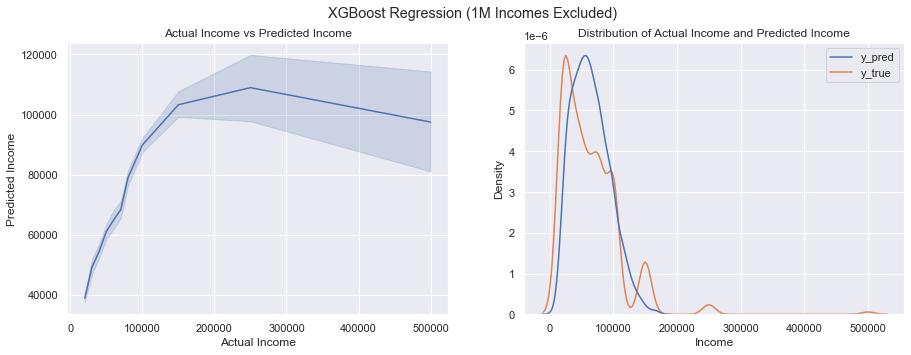

RMSE (train): 40336.680274644095
RMSE (test): 37883.483468855506
Default Metric Score (train): 0.40252249459016065
Default Metric Score (test): 0.3641733874732027


<Figure size 432x288 with 0 Axes>

In [104]:
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=10,
 min_child_weight=70,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 random_state=50)

xgb_param = xgb1.get_xgb_params()
xgtrain = xgb.DMatrix(x1_train_scaled, label=y1_train)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=5,
    metrics='rmse', early_stopping_rounds=50)
print('n_estimators =', cvresult.shape[0])
xgb1.set_params(n_estimators=cvresult.shape[0])
    
xgb1.fit(x1_train_scaled, y1_train)
performance_info(xgb1, x1_train_scaled, y1_train, x1_test_scaled, y1_test, 'XGBoost Regression (1M Incomes Excluded)')

**d. Tuning `subsample` and `colsample_bytree`**

In [105]:
param_test7 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=86,
 max_depth=10,
 min_child_weight=70,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 random_state=50)


gs1 = GridSearchCV(estimator = xgb1, param_grid = param_test7, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.915236e+09,3.270243e+08,"{'colsample_bytree': 0.6, 'subsample': 0.6}"
1,-1.915047e+09,3.220204e+08,"{'colsample_bytree': 0.6, 'subsample': 0.7}"
2,-1.914235e+09,3.273390e+08,"{'colsample_bytree': 0.6, 'subsample': 0.8}"
3,-1.907088e+09,3.206242e+08,"{'colsample_bytree': 0.6, 'subsample': 0.9}"
4,-1.908288e+09,3.196331e+08,"{'colsample_bytree': 0.7, 'subsample': 0.6}"
5,-1.907792e+09,3.239586e+08,"{'colsample_bytree': 0.7, 'subsample': 0.7}"
6,-1.902966e+09,3.222073e+08,"{'colsample_bytree': 0.7, 'subsample': 0.8}"
7,-1.899862e+09,3.191338e+08,"{'colsample_bytree': 0.7, 'subsample': 0.9}"
8,-1.914416e+09,3.237502e+08,"{'colsample_bytree': 0.8, 'subsample': 0.6}"
9,-1.910422e+09,3.294440e+08,"{'colsample_bytree': 0.8, 'subsample': 0.7}"


Best Parameters: {'colsample_bytree': 0.9, 'subsample': 0.8}
RMSE:  43495.338980183726


In [106]:
param_test8 = {
 'subsample':[i/100.0 for i in range(75, 86, 5)],
 'colsample_bytree':[i/100.0 for i in range(85, 101, 5)]
}

gs1 = GridSearchCV(estimator = xgb1, param_grid = param_test8, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.899036e+09,3.348045e+08,"{'colsample_bytree': 0.85, 'subsample': 0.75}"
1,-1.898704e+09,3.269037e+08,"{'colsample_bytree': 0.85, 'subsample': 0.8}"
2,-1.889278e+09,3.228402e+08,"{'colsample_bytree': 0.85, 'subsample': 0.85}"
3,-1.898320e+09,3.238302e+08,"{'colsample_bytree': 0.9, 'subsample': 0.75}"
4,-1.891845e+09,3.292221e+08,"{'colsample_bytree': 0.9, 'subsample': 0.8}"
5,-1.890049e+09,3.193756e+08,"{'colsample_bytree': 0.9, 'subsample': 0.85}"
6,-1.897873e+09,3.259239e+08,"{'colsample_bytree': 0.95, 'subsample': 0.75}"
7,-1.893218e+09,3.223125e+08,"{'colsample_bytree': 0.95, 'subsample': 0.8}"
8,-1.892784e+09,3.224874e+08,"{'colsample_bytree': 0.95, 'subsample': 0.85}"
9,-1.899476e+09,3.300574e+08,"{'colsample_bytree': 1.0, 'subsample': 0.75}"


Best Parameters: {'colsample_bytree': 0.85, 'subsample': 0.85}
RMSE:  43465.828111822746


**e. Tuning `reg_alpha` and `reg_lambda`**

In [107]:
param_test9 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda': [1e-5, 1e-2, 0.1, 1, 100]
}

xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=86,
 max_depth=10,
 min_child_weight=70,
 gamma=0,
 subsample=0.85,
 colsample_bytree=0.85,
 random_state=50)

gs1 = GridSearchCV(estimator = xgb1, param_grid = param_test9, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.891449e+09,3.199246e+08,"{'reg_alpha': 1e-05, 'reg_lambda': 1e-05}"
1,-1.889970e+09,3.186879e+08,"{'reg_alpha': 1e-05, 'reg_lambda': 0.01}"
2,-1.887801e+09,3.202313e+08,"{'reg_alpha': 1e-05, 'reg_lambda': 0.1}"
3,-1.889278e+09,3.228402e+08,"{'reg_alpha': 1e-05, 'reg_lambda': 1}"
4,-1.900927e+09,3.184393e+08,"{'reg_alpha': 1e-05, 'reg_lambda': 100}"
5,-1.891449e+09,3.199246e+08,"{'reg_alpha': 0.01, 'reg_lambda': 1e-05}"
6,-1.889970e+09,3.186879e+08,"{'reg_alpha': 0.01, 'reg_lambda': 0.01}"
7,-1.887801e+09,3.202313e+08,"{'reg_alpha': 0.01, 'reg_lambda': 0.1}"
8,-1.889278e+09,3.228402e+08,"{'reg_alpha': 0.01, 'reg_lambda': 1}"
9,-1.900927e+09,3.184393e+08,"{'reg_alpha': 0.01, 'reg_lambda': 100}"


Best Parameters: {'reg_alpha': 1, 'reg_lambda': 0.1}
RMSE:  43448.83121135601


In [108]:
param_test10 = {
 'reg_alpha':[0.5, 1, 1.5, 3],
 'reg_lambda': [0.05, 0.1, 0.2, 0.5]
}

gs1 = GridSearchCV(estimator = xgb1, param_grid = param_test10, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.890535e+09,3.223180e+08,"{'reg_alpha': 0.5, 'reg_lambda': 0.05}"
1,-1.887801e+09,3.202314e+08,"{'reg_alpha': 0.5, 'reg_lambda': 0.1}"
2,-1.888437e+09,3.208280e+08,"{'reg_alpha': 0.5, 'reg_lambda': 0.2}"
3,-1.890221e+09,3.205807e+08,"{'reg_alpha': 0.5, 'reg_lambda': 0.5}"
4,-1.890535e+09,3.223180e+08,"{'reg_alpha': 1, 'reg_lambda': 0.05}"
5,-1.887801e+09,3.202313e+08,"{'reg_alpha': 1, 'reg_lambda': 0.1}"
6,-1.888437e+09,3.208280e+08,"{'reg_alpha': 1, 'reg_lambda': 0.2}"
7,-1.890221e+09,3.205807e+08,"{'reg_alpha': 1, 'reg_lambda': 0.5}"
8,-1.890535e+09,3.223180e+08,"{'reg_alpha': 1.5, 'reg_lambda': 0.05}"
9,-1.887801e+09,3.202313e+08,"{'reg_alpha': 1.5, 'reg_lambda': 0.1}"


Best Parameters: {'reg_alpha': 3, 'reg_lambda': 0.1}
RMSE:  43448.830815617584


In [109]:
param_test11 = {
 'reg_alpha':[3, 10, 50],
 'reg_lambda':[.75, 1, 1.25]
}

gs1 = GridSearchCV(estimator = xgb1, param_grid = param_test11, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.891777e+09,3.239592e+08,"{'reg_alpha': 3, 'reg_lambda': 0.75}"
1,-1.889278e+09,3.228402e+08,"{'reg_alpha': 3, 'reg_lambda': 1}"
2,-1.891724e+09,3.185934e+08,"{'reg_alpha': 3, 'reg_lambda': 1.25}"
3,-1.891777e+09,3.239593e+08,"{'reg_alpha': 10, 'reg_lambda': 0.75}"
4,-1.889278e+09,3.228402e+08,"{'reg_alpha': 10, 'reg_lambda': 1}"
5,-1.891724e+09,3.185935e+08,"{'reg_alpha': 10, 'reg_lambda': 1.25}"
6,-1.891776e+09,3.239594e+08,"{'reg_alpha': 50, 'reg_lambda': 0.75}"
7,-1.888054e+09,3.245746e+08,"{'reg_alpha': 50, 'reg_lambda': 1}"
8,-1.891619e+09,3.187450e+08,"{'reg_alpha': 50, 'reg_lambda': 1.25}"


Best Parameters: {'reg_alpha': 50, 'reg_lambda': 1}
RMSE:  43451.74228239412


In [110]:
param_test12 = {
 'reg_alpha':[30, 40, 50, 60, 70],
}

xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=86,
 max_depth=10,
 min_child_weight=70,
 gamma=0,
 subsample=0.85,
 colsample_bytree=0.85,
 reg_lambda=1,
 random_state=50)

gs1 = GridSearchCV(estimator = xgb1, param_grid = param_test12, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gs1.fit(x1_train_scaled, y1_train)
display(pd.DataFrame({'mean_test_score': gs1.cv_results_['mean_test_score'] , 'std_test_score': gs1.cv_results_['std_test_score'], 'params': gs1.cv_results_['params']}))
print('Best Parameters:', gs1.best_params_)
print('RMSE: ', (gs1.best_score_ * -1)**0.5)

,mean_test_score,std_test_score,params
0,-1.889143e+09,3.230307e+08,{'reg_alpha': 30}
1,-1.888054e+09,3.245746e+08,{'reg_alpha': 40}
2,-1.888054e+09,3.245746e+08,{'reg_alpha': 50}
3,-1.888780e+09,3.240706e+08,{'reg_alpha': 60}
4,-1.888780e+09,3.240707e+08,{'reg_alpha': 70}


Best Parameters: {'reg_alpha': 50}
RMSE:  43451.74228239412


n_estimators = 757


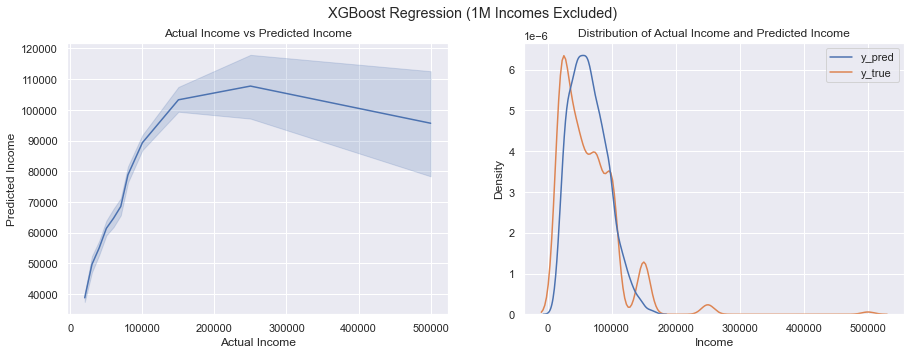

RMSE (train): 40421.909817729465
RMSE (test): 37829.069031499086
Default Metric Score (train): 0.39999494234061794
Default Metric Score (test): 0.3659986314296818


<Figure size 432x288 with 0 Axes>

In [111]:
xgb1 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=10,
 min_child_weight=70,
 gamma=0,
 subsample=0.85,
 colsample_bytree=0.85,
 reg_alpha = 50,
 reg_lambda = 1,
 random_state=50)

xgb_param = xgb1.get_xgb_params()
xgtrain = xgb.DMatrix(x1_train_scaled, label=y1_train)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=5,
    metrics='rmse', early_stopping_rounds=50)
print('n_estimators =', cvresult.shape[0])
xgb1.set_params(n_estimators=cvresult.shape[0])
    
xgb1.fit(x1_train_scaled, y1_train)
performance_info(xgb1, x1_train_scaled, y1_train, x1_test_scaled, y1_test, 'XGBoost Regression (1M Incomes Excluded)')

**f. Final Model**

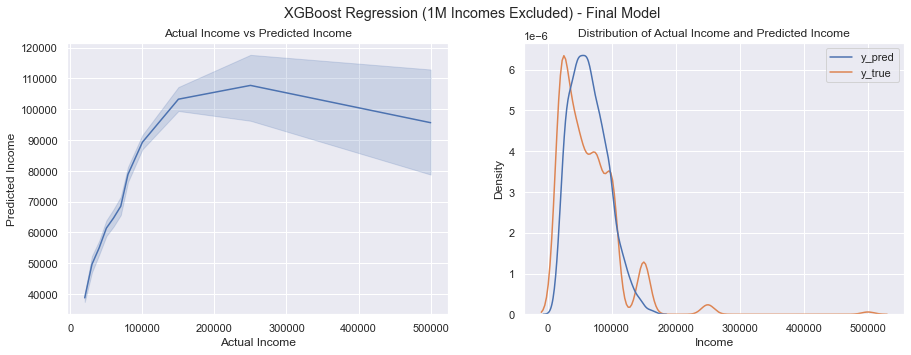

RMSE (train): 40421.909817729465
RMSE (test): 37829.069031499086
Default Metric Score (train): 0.39999494234061794
Default Metric Score (test): 0.3659986314296818


<Figure size 432x288 with 0 Axes>

In [112]:
xgb1 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=757,
 max_depth=10,
 min_child_weight=70,
 gamma=0,
 subsample=0.85,
 colsample_bytree=0.85,
 reg_alpha = 50,
 reg_lambda = 1,
 random_state=50)
xgb1.fit(x1_train_scaled, y1_train)
performance_info(xgb1, x1_train_scaled, y1_train, x1_test_scaled, y1_test, 'XGBoost Regression (1M Incomes Excluded) - Final Model')

> In summary:
> - For full dataset, we got a RMSE score 190908 and the default metric ($R^{2}$ score) was 0.0725.
> - For second dataset, we got a RMSE score 37829 and the default metric ($R^{2}$ score) was 0.3660.

## 3. Conclusions

In this project, we used several machine learning models to predict incomes of OKCupid users. Below are a table containing RMSEs from each model:

-- | Linear Regression | Negative Binomial Regression | Gamma Regression | XGBoost Regression
:-|:-:|:-:|:-:|:-:
**Full Dataset**| 191690 | 190141 | 190392 | 190908
**Excluding 1M**| 38203 | 37846 | 37775 | 37829

**For a full dataset, negative binomial regression perform better than other models with 190141 of RMSE.** To put it into perspective, using sample mean for prediction values will return 199367 of RMSE. **For a dataset excluding 1 million incomes, gamma regression perform better than other models with 37775 of RMSE.** To put it into perspective, using sample mean for prediction values will return 51070 of RMSE. For both dataset, linear regression performed the worst but the difference might not be noticeable for many purposes and the model itself is simpler to apply.

Along working with the project, we find some key points that might be useful for other related projects:
- Despite having high RMSEs, our models can still be useful in a situation where we might not need to be precise on the numbers, but rather on how similar incomes of two users. Therefore, applying classification model might also be more suitable for some purposes.
- We find several categorical values that have more outliers than other classes, they are 'jacked' (`body_type`), 'used up' (`body_type`), 'retired' (`job`), and 'desperately'(`drink`). These findings can be a good start to dig deeper into the outliers.